# Análise Exploratória dos dados do ENEM 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import mapclassify

from pywaffle import Waffle
%matplotlib inline

In [2]:
# Abrindo o arquivo de microdados do enem como dataframe usando o pandas
dadosEnem = pd.read_csv("Dados/MICRODADOS_ENEM_2019.csv", sep=";", encoding='ISO-8859-1')

In [3]:
dadosEnem.head() 

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA     NO_MUNICIPIO_RESIDENCIA  \
0  190001004627    2019                  1506807                    Santarém   
1  190001004628    2019                  1504059                  Mãe do Rio   
2  190001004629    2019                  1505502                 Paragominas   
3  190001004630    2019                  1507706  São Sebastião da Boa Vista   
4  190001004631    2019                  1503903                      Juruti   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                15               PA        21       M                1   
1                15               PA        16       F                1   
2                15               PA        18       F                1   
3                15               PA        23       M                0   
4                15               PA        23       M                1   

   TP_COR_RACA  ...  Q016  Q017 Q018  Q019 Q020  Q021  Q022  Q023  Q024  Q025  
0            3  ...     A     A    A     C    B     A     D     A     B     A  
1            3  ...     A     A    A     B    B     A     B     A     A     A  
2            1  ...     B     A    A     D    B     B     D     A     C     B  
3            3  ...     A     A    A     C    A     A     D     A     A     A  
4            3  ...     A     A    A     B    A     A     D     A     A     A  

[5 rows x 136 columns]

In [4]:
# Visualizando o conjunto de dados completo
dadosEnem

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  \
0        190001004627    2019                  1506807   
1        190001004628    2019                  1504059   
2        190001004629    2019                  1505502   
3        190001004630    2019                  1507706   
4        190001004631    2019                  1503903   
...               ...     ...                      ...   
5095265  190006129589    2019                  2928604   
5095266  190006129590    2019                  2927408   
5095267  190006129591    2019                  2931806   
5095268  190006129592    2019                  2927408   
5095269  190006129593    2019                  2914802   

            NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  \
0                          Santarém                15               PA   
1                        Mãe do Rio                15               PA   
2                       Paragominas                15               PA   
3        São Sebastião da Boa Vista                15               PA   
4                            Juruti                15               PA   
...                             ...               ...              ...   
5095265                 Santo Amaro                29               BA   
5095266                    Salvador                29               BA   
5095267                    Tremedal                29               BA   
5095268                    Salvador                29               BA   
5095269                     Itabuna                29               BA   

         NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  ...  Q016  Q017 Q018  \
0              21       M                1            3  ...     A     A    A   
1              16       F                1            3  ...     A     A    A   
2              18       F                1            1  ...     B     A    A   
3              23       M                0            3  ...     A     A    A   
4              23       M                1            3  ...     A     A    A   
...           ...     ...              ...          ...  ...   ...   ...  ...   
5095265        28       F                2            2  ...     A     A    A   
5095266        25       M                1            2  ...     A     A    A   
5095267        18       F                1            3  ...     A     A    A   
5095268        16       M                1            1  ...     B     A    A   
5095269        25       F                1            2  ...     B     A    B   

         Q019 Q020  Q021  Q022  Q023  Q024  Q025  
0           C    B     A     D     A     B     A  
1           B    B     A     B     A     A     A  
2           D    B     B     D     A     C     B  
3           C    A     A     D     A     A     A  
4           B    A     A     D     A     A     A  
...       ...  ...   ...   ...   ...   ...   ...  
5095265     B    A     A     B     A     A     B  
5095266     A    A     A     B     A     A     A  
5095267     B    A     A     B     A     A     B  
5095268     B    B     A     C     A     B     B  
5095269     B    B     A     B     A     B     B  

[5095270 rows x 136 columns]

In [5]:
# Pegando os nomes de todas as colunas para selecionar apenas as de interesse com base no dicionário
dadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
# Filtrando apenas os dados de Interesse 
dadosInteresse = [  'NU_INSCRICAO',
                    'CO_MUNICIPIO_RESIDENCIA', 
                    'NO_MUNICIPIO_RESIDENCIA',
                    'CO_UF_RESIDENCIA',
                    'SG_UF_RESIDENCIA',
                    'NU_IDADE',
                    'TP_SEXO',
                    'TP_COR_RACA',
                    'IN_GESTANTE',
                    'NU_NOTA_CN', 
                    'NU_NOTA_CH',
                    'NU_NOTA_LC',
                    'NU_NOTA_MT',
                    'NU_NOTA_REDACAO', 
                     'Q001', 
                     'Q002',
                     'Q006']

In [7]:
# Filtrando o dataset principal só com as colunas de interesse
dadosEnemInteresse = dadosEnem.filter(items=dadosInteresse)

In [8]:
# Head do novo dataset
dadosEnemInteresse.head()

NU_INSCRICAO  CO_MUNICIPIO_RESIDENCIA     NO_MUNICIPIO_RESIDENCIA  \
0  190001004627                  1506807                    Santarém   
1  190001004628                  1504059                  Mãe do Rio   
2  190001004629                  1505502                 Paragominas   
3  190001004630                  1507706  São Sebastião da Boa Vista   
4  190001004631                  1503903                      Juruti   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
0                15               PA        21       M            3   
1                15               PA        16       F            3   
2                15               PA        18       F            1   
3                15               PA        23       M            3   
4                15               PA        23       M            3   

   IN_GESTANTE  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0            0       472.9       466.0       497.3       369.1   
1            0       358.9       495.4       482.3       416.5   
2            0       574.2       538.7       582.6       571.5   
3            0         NaN         NaN         NaN         NaN   
4            0         NaN         NaN         NaN         NaN   

   NU_NOTA_REDACAO Q001 Q002 Q006  
0            780.0    D    E    B  
1            600.0    D    E    B  
2            640.0    H    E    C  
3              NaN    D    D    C  
4              NaN    B    C    C

# Análise de Inscritos por Estado

In [9]:
# Fazendo uma Analise dos Inscritos por Estado
dadosEstado = dadosEnemInteresse['SG_UF_RESIDENCIA']

In [10]:
dadosEstado

0          PA
1          PA
2          PA
3          PA
4          PA
           ..
5095265    BA
5095266    BA
5095267    BA
5095268    BA
5095269    BA
Name: SG_UF_RESIDENCIA, Length: 5095270, dtype: object

In [11]:
CountCandidatos = dadosEstado.value_counts()
CountCandidatos

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

<AxesSubplot:>

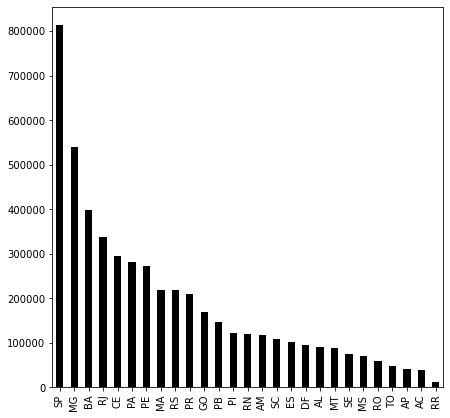

In [12]:
# Visualização do Número de candidatos por Estado 
CountCandidatos.plot.bar(figsize=(7,7), color='black')

# Analise dos Inscritos apenas para o Estado do Rio de Janeiro

In [13]:
# Descendo a granularidade apenas para municipios do Rio de Janeiro
dadosMunicipio = dadosEnemInteresse.filter(items=['NO_MUNICIPIO_RESIDENCIA',
                                                    'SG_UF_RESIDENCIA'])

In [14]:
dadosMunicipio = dadosMunicipio.query('SG_UF_RESIDENCIA=="RJ"')

In [15]:
# Contagem de candidatos por Municipio do Rio de Janeiro
CountCandidatosMunicipio = dadosMunicipio.groupby('NO_MUNICIPIO_RESIDENCIA').count().sort_values('SG_UF_RESIDENCIA', ascending=False)

In [16]:
CountCandidatosMunicipio

SG_UF_RESIDENCIA
NO_MUNICIPIO_RESIDENCIA                  
Rio de Janeiro                     137762
São Gonçalo                         20305
Nova Iguaçu                         16985
Duque de Caxias                     16352
Niterói                             13898
...                                   ...
Santa Maria Madalena                  140
Rio das Flores                        101
Laje do Muriaé                        101
São Sebastião do Alto                  99
São José de Ubá                        97

[92 rows x 1 columns]

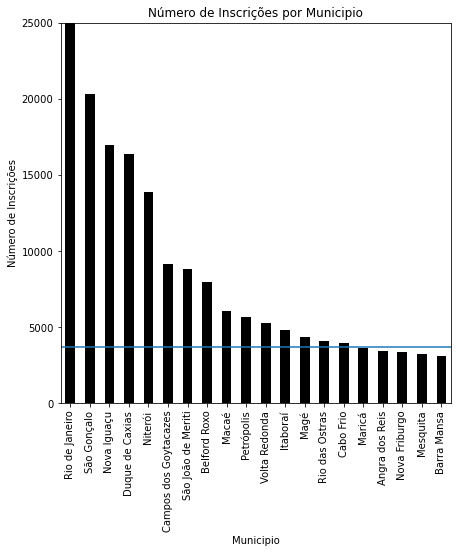

In [17]:
# plotando o número de Inscrições por Municipio com a linha média
fig, ax = plt.subplots()

CountCandidatosMunicipio.plot(kind="bar", ax=ax, color='black',figsize=(7,7))
ax.set_xlabel("Municipio")
ax.set_ylabel("Número de Inscrições")
ax.set_title(("Número de Inscrições por Municipio"), fontsize=12)
ax.set_xlim([-0.5, 19.5])
ax.set_ylim([0, 25000])
ax.get_legend().remove()

mean = CountCandidatosMunicipio['SG_UF_RESIDENCIA'].mean()
ax.axhline(mean)

In [18]:
mean

3681.6304347826085

# Analise dos Candidatos de Nova Friburgo x Candidatos do Rio de Janeiro

In [19]:
# Criando um dataset somente com dados de Nova Friburgo
dadosNovaFriburgo = dadosEnemInteresse.filter(items=['NU_INSCRICAO',
                                                     'CO_MUNICIPIO_RESIDENCIA', 
                                                         'NO_MUNICIPIO_RESIDENCIA',
                                                         'CO_UF_RESIDENCIA',
                                                         'SG_UF_RESIDENCIA',
                                                         'NU_IDADE',
                                                         'TP_SEXO',
                                                         'TP_COR_RACA',
                                                         'IN_GESTANTE',
                                                         'NU_NOTA_CN', 
                                                         'NU_NOTA_CH',
                                                         'NU_NOTA_LC',
                                                         'NU_NOTA_MT',
                                                         'NU_NOTA_REDACAO',
                                                         'Q001',
                                                         'Q002',
                                                         'Q006'])

dadosNovaFriburgo = dadosNovaFriburgo.query('NO_MUNICIPIO_RESIDENCIA=="Nova Friburgo"')

In [20]:
dadosNovaFriburgo.head()

NU_INSCRICAO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
292438  190001297072                  3303401           Nova Friburgo   
509233  190001513873                  3303401           Nova Friburgo   
509237  190001513877                  3303401           Nova Friburgo   
509254  190001513894                  3303401           Nova Friburgo   
509298  190001513938                  3303401           Nova Friburgo   

        CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
292438                33               RJ        30       F            3   
509233                33               RJ        18       F            1   
509237                33               RJ        20       M            1   
509254                33               RJ        17       F            1   
509298                33               RJ        19       F            1   

        IN_GESTANTE  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
292438            0       468.0       467.0       564.1       562.1   
509233            0       428.6       543.3       534.3       484.7   
509237            0         NaN         NaN         NaN         NaN   
509254            0       627.4       681.4       631.7       736.1   
509298            0         NaN         NaN         NaN         NaN   

        NU_NOTA_REDACAO Q001 Q002 Q006  
292438            520.0    D    B    E  
509233            760.0    D    D    C  
509237              NaN    E    F    H  
509254            980.0    E    F    O  
509298              NaN    C    C    C

In [21]:
# Criando um dataset somente com dados do Rio de Janeiro
dadosRioDeJaneiro = dadosEnemInteresse.filter(items=['NU_INSCRICAO',
                                                     'CO_MUNICIPIO_RESIDENCIA', 
                                                         'NO_MUNICIPIO_RESIDENCIA',
                                                         'CO_UF_RESIDENCIA',
                                                         'SG_UF_RESIDENCIA',
                                                         'NU_IDADE',
                                                         'TP_SEXO',
                                                         'TP_COR_RACA',
                                                         'IN_GESTANTE',
                                                         'NU_NOTA_CN', 
                                                         'NU_NOTA_CH',
                                                         'NU_NOTA_LC',
                                                         'NU_NOTA_MT',
                                                         'NU_NOTA_REDACAO',
                                                         'Q001',
                                                         'Q002',
                                                         'Q006'])

dadosRioDeJaneiro = dadosRioDeJaneiro.query('SG_UF_RESIDENCIA=="RJ"')

In [22]:
dadosRioDeJaneiro.head()

NU_INSCRICAO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
10600  190001015227                  3302056                  Italva   
21074  190001025702                  3305109      São João de Meriti   
22657  190001027285                  3304557          Rio de Janeiro   
30365  190001034993                  3304557          Rio de Janeiro   
60937  190001065566                  3304557          Rio de Janeiro   

       CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
10600                33               RJ        32       F            3   
21074                33               RJ        32       M            3   
22657                33               RJ        26       M            3   
30365                33               RJ        19       F            3   
60937                33               RJ        22       F            3   

       IN_GESTANTE  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
10600            0       464.4       444.7       469.8       419.8   
21074            0         NaN         NaN         NaN         NaN   
22657            0         NaN         NaN         NaN         NaN   
30365            0       423.1       499.0       522.1       431.8   
60937            0         NaN         NaN         NaN         NaN   

       NU_NOTA_REDACAO Q001 Q002 Q006  
10600            640.0    B    B    C  
21074              NaN    F    E    C  
22657              NaN    E    E    E  
30365            560.0    C    E    B  
60937              NaN    B    C    B

#### Calculando quanto representa em % o número de candidatos de Nova Friburgo, com relação ao total de Inscritos do estado


In [23]:
TotalInscricoesRJ = dadosRioDeJaneiro['NU_INSCRICAO'].count()
TotalInscricoesRJ

338710

In [24]:
inscricoesNF = dadosNovaFriburgo['NU_INSCRICAO'].count()
inscricoesNF

3347

In [25]:
percentCandidatos = 1 - 100*inscricoesNF / TotalInscricoesRJ
percentCandidatos

0.011839036343774922

## Análise da Idade dos Candidatos

In [26]:
# Fazendo a analise da idade dos candidatos do Rio de Janeiro
dadosIdadeRJ =  dadosRioDeJaneiro['NU_IDADE']
dadosIdadeRJ

10600      32
21074      32
22657      26
30365      19
60937      22
           ..
5094268    18
5094269    52
5094270    23
5094271    32
5094272    41
Name: NU_IDADE, Length: 338710, dtype: int64

In [27]:
dadosIdadeRJ.value_counts()

18    61059
17    47364
19    44284
20    30057
21    19802
      ...  
12        2
9         1
83        1
86        1
88        1
Name: NU_IDADE, Length: 77, dtype: int64

In [28]:
# Repetindo a analise para os dados de Nova Friburgo 
dadosIdadeNF =  dadosNovaFriburgo['NU_IDADE']
dadosIdadeNF

292438     30
509233     18
509237     20
509254     17
509298     19
           ..
5087949    49
5091166    20
5092154    19
5092160    18
5094221    51
Name: NU_IDADE, Length: 3347, dtype: int64

In [29]:
dadosIdadeNF.value_counts()

18    826
17    682
19    429
20    243
16    233
21    156
22    119
23    108
24     80
25     63
15     48
26     35
27     34
28     33
29     29
30     25
31     18
34     14
39     12
37     11
35     11
32     11
33     10
36     10
40      9
38      9
42      8
45      7
44      6
57      6
49      6
46      6
43      5
53      5
48      5
47      4
54      4
41      4
51      4
58      3
61      3
56      3
52      3
63      1
59      1
14      1
55      1
60      1
50      1
67      1
Name: NU_IDADE, dtype: int64

Text(0.5, 1.0, 'Distribuição da Idade no Municipio de Nova Friburgo')

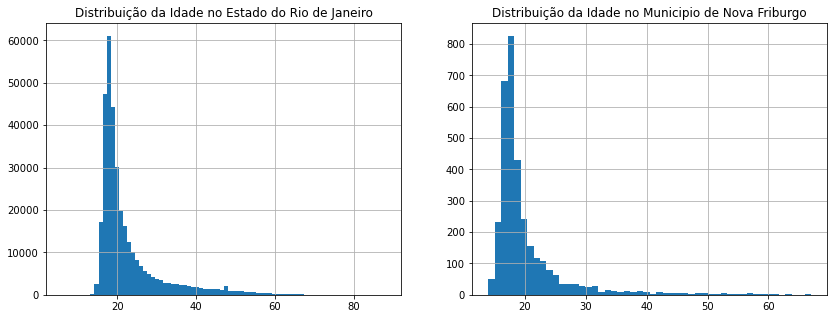

In [30]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

dadosIdadeRJ.hist(bins=80, ax=axes[0]).set_title('Distribuição da Idade no Estado do Rio de Janeiro')
dadosIdadeNF.hist(bins=50, ax=axes[1]).set_title('Distribuição da Idade no Municipio de Nova Friburgo')


## Análise do Sexo dos Candidatos

In [31]:
# Fazendo a analise por sexo do candidato 
dadosSexoRJ = dadosRioDeJaneiro['TP_SEXO']

In [32]:
distribuicaoSexoRJ = dadosSexoRJ.value_counts()

In [33]:
distribuicaoSexoRJ

F    202488
M    136222
Name: TP_SEXO, dtype: int64

In [34]:
dadosSexoNF = dadosNovaFriburgo['TP_SEXO']

In [35]:
distribuicaoSexoNF = dadosSexoNF.value_counts()

In [36]:
distribuicaoSexoNF

F    1948
M    1399
Name: TP_SEXO, dtype: int64

In [37]:
percentSexoRJ = [100*x/distribuicaoSexoRJ.sum() for x in distribuicaoSexoRJ]

In [38]:
percentSexoRJ

[59.78211449322429, 40.21788550677571]

In [39]:
percentSexoNF = [100*x/distribuicaoSexoNF.sum() for x in distribuicaoSexoNF]

In [40]:
percentSexoNF

[58.20137436510308, 41.79862563489692]

In [41]:
# Fazendo os dicionários para plotar o gráfico
distribuicaoSexoRJdict = (distribuicaoSexoRJ/10000).to_dict()

In [42]:
distribuicaoSexoRJdict

{'F': 20.2488, 'M': 13.6222}

In [43]:
distribuicaoSexoNFdict = (distribuicaoSexoNF/100).to_dict()

In [44]:
distribuicaoSexoNFdict

{'F': 19.48, 'M': 13.99}

C:\Users\jon_j\anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


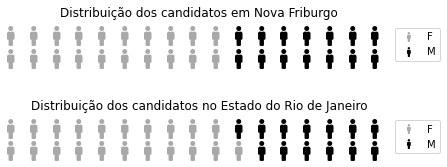

In [45]:
# Plotando os gráficos

fig = plt.figure(
    FigureClass=Waffle,
    rows=2,  
    icons= 'male',
    font_size=20,
    icon_legend=True,
    figsize=(7, 4),
    plots={ 
        
    '311': {
    
    'values': distribuicaoSexoNFdict, 
    'colors': (  "darkgray", "black" ),
     'legend': {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
     'title':{'label':'Distribuição dos candidatos em Nova Friburgo'}
   
         },
    
        
    '111': {
    
    'values': distribuicaoSexoRJdict, 
    'colors': (  "darkgray", "black" ),
     'legend': {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
     'title':{'label':'Distribuição dos candidatos no Estado do Rio de Janeiro'}
         }
   }
)

# Aproximadamente 20 Mulheres para cada 14 Homens em Nova Friburgo
# Aproximadamente 21 Mulheres para cada 13 Homens no Rio de Janeiro

#### Análise das Candidatas Gestantes

In [46]:
# Verificando quantos % da população feminina fizeram a prova em periodo de gestação
sexoFemininoRJ = distribuicaoSexoRJ[0]
sexoFemininoRJ

202488

In [47]:
dadosGestanteRJ = dadosRioDeJaneiro['IN_GESTANTE']

In [48]:
distInGestanteRJ = dadosGestanteRJ.value_counts()

In [49]:
distInGestanteRJ

0    338628
1        82
Name: IN_GESTANTE, dtype: int64

In [50]:
NumeroGestantesRJ = distInGestanteRJ[1]
NumeroGestantesRJ

82

In [51]:
# Fazendo a analise para população de Nova Friburgo
sexoFemininoNF = distribuicaoSexoNF[0]
sexoFemininoNF

1948

In [52]:
dadosGestanteNF = dadosNovaFriburgo['IN_GESTANTE']

In [53]:
distInGestanteNF = dadosGestanteNF.value_counts()

In [54]:
distInGestanteNF

0    3346
1       1
Name: IN_GESTANTE, dtype: int64

In [55]:
NumeroGestantesNF = distInGestanteNF[1]
NumeroGestantesNF

1

#### Percentual de Candidatas em periodo de gestação durante a prova do ENEM

In [56]:
# Percentual para o Estado do Rio de Janeiro
percentGestantesRJ = 100*NumeroGestantesRJ/sexoFemininoRJ
percentGestantesRJ

0.040496226936904904

In [57]:
# Percentual para o Municipio de Nova Friburgo
percentGestantesNF = 100*NumeroGestantesNF/sexoFemininoNF
percentGestantesNF

0.0513347022587269

## Análise das Notas por Sexo

In [58]:
# NU_NOTA_CN - Ciências da Natureza
# NU_NOTA_CH - Ciências Humanas
# NU_NOTA_LC - Linguagens e códigos
# NU_NOTA_MT - Matemática 
# NU_NOTA_REDACAO - Redação

In [59]:
# Verificando a quantidade de registros nulos para o Dataframe do Rio de Janeiro
dadosRioDeJaneiro.isnull().sum(axis=0)

NU_INSCRICAO                   0
CO_MUNICIPIO_RESIDENCIA        0
NO_MUNICIPIO_RESIDENCIA        0
CO_UF_RESIDENCIA               0
SG_UF_RESIDENCIA               0
NU_IDADE                       0
TP_SEXO                        0
TP_COR_RACA                    0
IN_GESTANTE                    0
NU_NOTA_CN                 93786
NU_NOTA_CH                 79431
NU_NOTA_LC                 79431
NU_NOTA_MT                 93786
NU_NOTA_REDACAO            79431
Q001                           0
Q002                           0
Q006                           0
dtype: int64

In [60]:
# Removendo os registros nulos
dadosRioDeJaneiro = dadosRioDeJaneiro.dropna()

In [61]:
# Verificando novamente a quantidade de registros nulos
dadosRioDeJaneiro.isnull().sum(axis=0)

NU_INSCRICAO               0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_COR_RACA                0
IN_GESTANTE                0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
dtype: int64

In [62]:
# Verificando a quantidade de registros nulos para o Dataframe de Nova Friburgo
dadosNovaFriburgo.isnull().sum(axis=0)

NU_INSCRICAO                 0
CO_MUNICIPIO_RESIDENCIA      0
NO_MUNICIPIO_RESIDENCIA      0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
IN_GESTANTE                  0
NU_NOTA_CN                 765
NU_NOTA_CH                 630
NU_NOTA_LC                 630
NU_NOTA_MT                 765
NU_NOTA_REDACAO            630
Q001                         0
Q002                         0
Q006                         0
dtype: int64

In [63]:
# Removendo os registros nulos
dadosNovaFriburgo = dadosNovaFriburgo.dropna()

In [64]:
# Verificando novamente a quantidade de registros nulos
dadosNovaFriburgo.isnull().sum(axis=0)

NU_INSCRICAO               0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_COR_RACA                0
IN_GESTANTE                0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
dtype: int64

In [65]:
# Analisando as Notas Por Sexo
dadosSexoNota = ['TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [66]:
dadosSexoNotaRJ = dadosRioDeJaneiro.filter(items=dadosSexoNota)
dadosSexoNotaRJ.head()

TP_SEXO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
10600        F       464.4       444.7       469.8       419.8   
30365        F       423.1       499.0       522.1       431.8   
81663        M       549.1       642.3       573.9       673.9   
135524       F       363.2       413.4       489.7       488.6   
149412       F       508.0       605.6       579.0       580.4   

        NU_NOTA_REDACAO  
10600             640.0  
30365             560.0  
81663             700.0  
135524            400.0  
149412            900.0

In [67]:
dadosSexoNotaRJMax = dadosSexoNotaRJ.rename(columns={'NU_NOTA_CN': 'Ciências da Natureza',
                                                       'NU_NOTA_CH':'Ciências Humanas',
                                                       'NU_NOTA_LC':'Linguagens e códigos',
                                                       'NU_NOTA_MT':'Matemática',
                                                       'NU_NOTA_REDACAO':'Redação',
                                                        'TP_SEXO': 'Sexo'})

In [68]:
dadosSexoNotaRJMax.head()

Sexo  Ciências da Natureza  Ciências Humanas  Linguagens e códigos  \
10600     F                 464.4             444.7                 469.8   
30365     F                 423.1             499.0                 522.1   
81663     M                 549.1             642.3                 573.9   
135524    F                 363.2             413.4                 489.7   
149412    F                 508.0             605.6                 579.0   

        Matemática  Redação  
10600        419.8    640.0  
30365        431.8    560.0  
81663        673.9    700.0  
135524       488.6    400.0  
149412       580.4    900.0

In [69]:
dadosSexoNotaNF = dadosNovaFriburgo.filter(items=dadosSexoNota)
dadosSexoNotaNF.head()

TP_SEXO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
292438       F       468.0       467.0       564.1       562.1   
509233       F       428.6       543.3       534.3       484.7   
509254       F       627.4       681.4       631.7       736.1   
509809       M       521.2       588.5       544.5       667.0   
510160       M       594.1       618.5       591.7       684.7   

        NU_NOTA_REDACAO  
292438            520.0  
509233            760.0  
509254            980.0  
509809            620.0  
510160            560.0

In [70]:
dadosSexoNotaNFMax = dadosSexoNotaNF.rename(columns={'NU_NOTA_CN': 'Ciências da Natureza',
                                                       'NU_NOTA_CH':'Ciências Humanas',
                                                       'NU_NOTA_LC':'Linguagens e códigos',
                                                       'NU_NOTA_MT':'Matemática',
                                                       'NU_NOTA_REDACAO':'Redação',
                                                        'TP_SEXO': 'Sexo'})

In [71]:
dadosSexoNotaNFMax.head()

Sexo  Ciências da Natureza  Ciências Humanas  Linguagens e códigos  \
292438    F                 468.0             467.0                 564.1   
509233    F                 428.6             543.3                 534.3   
509254    F                 627.4             681.4                 631.7   
509809    M                 521.2             588.5                 544.5   
510160    M                 594.1             618.5                 591.7   

        Matemática  Redação  
292438       562.1    520.0  
509233       484.7    760.0  
509254       736.1    980.0  
509809       667.0    620.0  
510160       684.7    560.0

#### Nota máxima por Sexo

In [72]:
# Nota Maxima por Sexo no Estado do Rio de Janeiro
dadosSexoNotaRJMax.groupby(['Sexo']).max()

Ciências da Natureza  Ciências Humanas  Linguagens e códigos  \
Sexo                                                                 
F                    831.6             791.1                 787.3   
M                    811.1             835.1                 742.1   

      Matemática  Redação  
Sexo                       
F          974.3   1000.0  
M          985.0   1000.0

In [73]:
dadosSexoNotaRJMax = dadosSexoNotaRJMax.groupby(['Sexo']).max().T
dadosSexoNotaRJMax

Sexo                       F       M
Ciências da Natureza   831.6   811.1
Ciências Humanas       791.1   835.1
Linguagens e códigos   787.3   742.1
Matemática             974.3   985.0
Redação               1000.0  1000.0

In [74]:
# Nota Maxima por Sexo no Municipio de Nova Friburgo 
dadosSexoNotaNFMax.groupby(['Sexo']).max()

Ciências da Natureza  Ciências Humanas  Linguagens e códigos  \
Sexo                                                                 
F                    729.2             707.9                 719.4   
M                    746.6             746.0                 685.9   

      Matemática  Redação  
Sexo                       
F          929.6    980.0  
M          929.8    980.0

In [75]:
dadosSexoNotaNFMax = dadosSexoNotaNFMax.groupby(['Sexo']).max().T
dadosSexoNotaNFMax

Sexo                      F      M
Ciências da Natureza  729.2  746.6
Ciências Humanas      707.9  746.0
Linguagens e códigos  719.4  685.9
Matemática            929.6  929.8
Redação               980.0  980.0

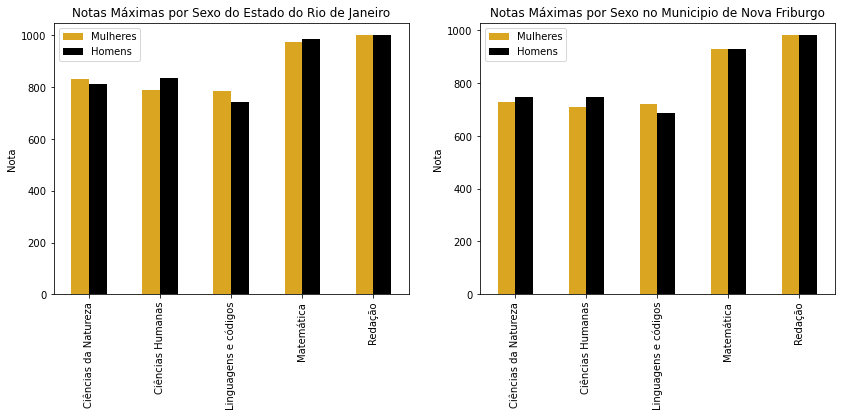

In [76]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

dadosSexoNotaRJMax.plot.bar(
    color=['Goldenrod','black'],
    title='Notas Máximas por Sexo do Estado do Rio de Janeiro',
    ylabel = 'Nota',
    ax=axes[0]
).legend(["Mulheres", "Homens"])

dadosSexoNotaNFMax.plot.bar(
    color=['Goldenrod','black'],
    title='Notas Máximas por Sexo no Municipio de Nova Friburgo',
    ylabel = 'Nota',
    ax=axes[1]
).legend(["Mulheres", "Homens"])

#### Nota Minima por Sexo

In [77]:
# Nota Minima por Sexo no Estado do Rio de Janeiro 
dadosSexoNotaRJ.groupby('TP_SEXO').min()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
TP_SEXO                                                                 
F               0.0         0.0         0.0         0.0              0.0
M               0.0         0.0         0.0         0.0              0.0

In [78]:
# Nota Minima por Sexo desconsiderando 0 para o Estado do Rio de Janeiro
dadosSexoNotaRJMin = dadosSexoNotaRJ.where(dadosSexoNotaRJ.NU_NOTA_CN > 0) \
             .where(dadosSexoNotaRJ.NU_NOTA_CH > 0 ) \
             .where(dadosSexoNotaRJ.NU_NOTA_LC > 0 ) \
             .where(dadosSexoNotaRJ.NU_NOTA_MT > 0 ) \
             .where(dadosSexoNotaRJ.NU_NOTA_REDACAO > 0 ) \
             .groupby('TP_SEXO') \
             .min()

# Renomeando as colunas para melhor entendimento
dadosSexoNotaRJMin = dadosSexoNotaRJMin.rename(columns={'NU_NOTA_CN': 'Ciências da Natureza',
                                                       'NU_NOTA_CH':'Ciências Humanas',
                                                       'NU_NOTA_LC':'Linguagens e códigos',
                                                       'NU_NOTA_MT':'Matemática',
                                                       'NU_NOTA_REDACAO':'Redação'})

dadosSexoNotaRJMin = dadosSexoNotaRJMin.T
dadosSexoNotaRJMin

TP_SEXO                   F      M
Ciências da Natureza  327.9  327.9
Ciências Humanas      315.9  315.9
Linguagens e códigos  323.2  322.0
Matemática            359.0  359.0
Redação                40.0   80.0

#### Análise para os dados de Nova friburgo

In [79]:
# Nota Minima por Sexo No Municipio de Nova Friburgo
dadosSexoNotaNF.groupby('TP_SEXO').min()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
TP_SEXO                                                                 
F             334.5         0.0         0.0       364.4              0.0
M               0.0       323.3       331.9         0.0              0.0

In [80]:
# Nota Minima por Sexo desconsiderando 0 para o Municipio de Nova Friburgo
dadosSexoNotaNFMin = dadosSexoNotaNF.where(dadosSexoNotaNF.NU_NOTA_CN > 0) \
             .where(dadosSexoNotaNF.NU_NOTA_CH > 0 ) \
             .where(dadosSexoNotaNF.NU_NOTA_LC > 0 ) \
             .where(dadosSexoNotaNF.NU_NOTA_MT > 0 ) \
             .where(dadosSexoNotaNF.NU_NOTA_REDACAO > 0 ) \
             .groupby('TP_SEXO') \
             .min()

# Renomeando as colunas para melhor entendimento
dadosSexoNotaNFMin = dadosSexoNotaNFMin.rename(columns={'NU_NOTA_CN': 'Ciências da Natureza',
                                                       'NU_NOTA_CH':'Ciências Humanas',
                                                       'NU_NOTA_LC':'Linguagens e códigos',
                                                       'NU_NOTA_MT':'Matemática',
                                                       'NU_NOTA_REDACAO':'Redação'})

#Fazendo a transposta para facilitar a plotagem do gráfico
dadosSexoNotaNFMin = dadosSexoNotaNFMin.T
dadosSexoNotaNFMin

TP_SEXO                   F      M
Ciências da Natureza  334.5  333.4
Ciências Humanas      333.5  323.3
Linguagens e códigos  330.5  331.9
Matemática            364.4  360.4
Redação               240.0  200.0

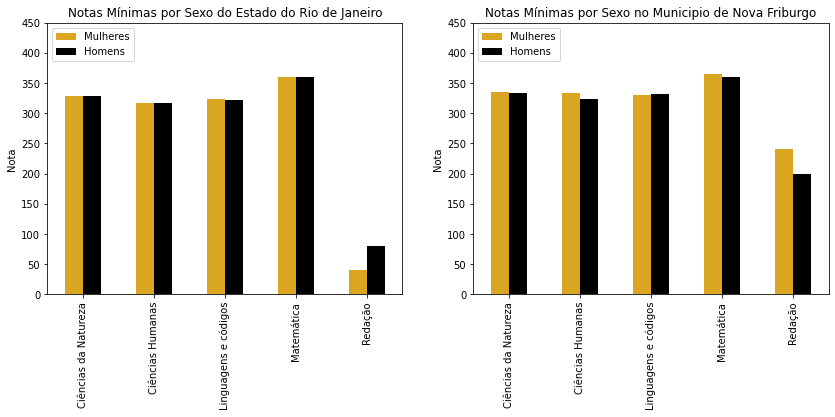

In [81]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

dadosSexoNotaRJMin.plot.bar(
    color=['Goldenrod','black'],
    title='Notas Mínimas por Sexo do Estado do Rio de Janeiro',
    ylabel = 'Nota',
    ylim=(0,450),
    ax=axes[0]
).legend(["Mulheres", "Homens"], loc = "upper left")

dadosSexoNotaNFMin.plot.bar(
    color=['Goldenrod','black'],
    title='Notas Mínimas por Sexo no Municipio de Nova Friburgo',
    ylabel = 'Nota',
    ax=axes[1],
    ylim=(0,450),
).legend(["Mulheres", "Homens"], loc = "upper left")

#### Média das notas por Sexo separados por Municipios

In [82]:
# Média das Notas por Sexo e por Municipio
dadosMediaRJ = dadosRioDeJaneiro.filter(items=['CO_MUNICIPIO_RESIDENCIA', 
                                                         'NO_MUNICIPIO_RESIDENCIA',
                                                         'TP_SEXO',
                                                         'NU_NOTA_CN',
                                                         'NU_NOTA_LC',
                                                         'NU_NOTA_CH',
                                                         'NU_NOTA_MT', 
                                                         'NU_NOTA_REDACAO'])

dadosMediaRJ.head()

CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA TP_SEXO  NU_NOTA_CN  \
10600                   3302056                  Italva       F       464.4   
30365                   3304557          Rio de Janeiro       F       423.1   
81663                   3304557          Rio de Janeiro       M       549.1   
135524                  3304557          Rio de Janeiro       F       363.2   
149412                  3302205               Itaperuna       F       508.0   

        NU_NOTA_LC  NU_NOTA_CH  NU_NOTA_MT  NU_NOTA_REDACAO  
10600        469.8       444.7       419.8            640.0  
30365        522.1       499.0       431.8            560.0  
81663        573.9       642.3       673.9            700.0  
135524       489.7       413.4       488.6            400.0  
149412       579.0       605.6       580.4            900.0

In [83]:
# Separando os datasets em Masculino e Feminino
dadosMediaRJF = dadosMediaRJ.query('TP_SEXO=="F"')
dadosMediaRJM = dadosMediaRJ.query('TP_SEXO=="M"')

# Agrupando por Municipio
dadosMediaRJF = dadosMediaRJF.groupby(['CO_MUNICIPIO_RESIDENCIA']).mean()
dadosMediaRJM = dadosMediaRJM.groupby(['CO_MUNICIPIO_RESIDENCIA']).mean()

# Renomeando as colunas para juntar os dois datasets
dadosMediaRJF = dadosMediaRJF.rename(columns={'NU_NOTA_CN': 'NU_NOTA_CN_F',
                                                       'NU_NOTA_CH':'NU_NOTA_CH_F',
                                                       'NU_NOTA_LC':'NU_NOTA_LC_F',
                                                       'NU_NOTA_MT':'NU_NOTA_MT_F',
                                                       'NU_NOTA_REDACAO':'NU_NOTA_REDACAO_F'})

dadosMediaRJM = dadosMediaRJM.rename(columns={'NU_NOTA_CN': 'NU_NOTA_CN_M',
                                                       'NU_NOTA_CH':'NU_NOTA_CH_M',
                                                       'NU_NOTA_LC':'NU_NOTA_LC_M',
                                                       'NU_NOTA_MT':'NU_NOTA_MT_M',
                                                       'NU_NOTA_REDACAO':'NU_NOTA_REDACAO_M'})

In [84]:
dadosMediaRJF.head()

NU_NOTA_CN_F  NU_NOTA_LC_F  NU_NOTA_CH_F  \
CO_MUNICIPIO_RESIDENCIA                                             
3300100                    468.105486    528.038750    506.151111   
3300159                    484.249020    533.383333    517.768627   
3300209                    479.353376    530.527646    510.928102   
3300225                    462.440426    521.528723    497.386170   
3300233                    485.271687    535.299699    523.575301   

                         NU_NOTA_MT_F  NU_NOTA_REDACAO_F  
CO_MUNICIPIO_RESIDENCIA                                   
3300100                    500.253194         564.805556  
3300159                    530.749020         661.372549  
3300209                    513.255383         597.846715  
3300225                    499.295745         589.574468  
3300233                    515.543675         619.698795

In [85]:
dadosMediaRJM.head()

NU_NOTA_CN_M  NU_NOTA_LC_M  NU_NOTA_CH_M  \
CO_MUNICIPIO_RESIDENCIA                                             
3300100                    487.446519    530.619879    521.239455   
3300159                    510.793103    525.944828    523.763793   
3300209                    502.207703    535.112355    530.554360   
3300225                    491.458462    529.196923    515.090769   
3300233                    499.966484    541.879121    539.200000   

                         NU_NOTA_MT_M  NU_NOTA_REDACAO_M  
CO_MUNICIPIO_RESIDENCIA                                   
3300100                    550.733703         548.920283  
3300159                    565.734483         604.137931  
3300209                    564.542587         588.343023  
3300225                    538.476923         599.076923  
3300233                    558.347802         600.109890

In [86]:
# Fazendo o merge com a tabela que vai fornecer os pontos gráficos que irão ser plotados com o geopandas
gpdMunicipios = gpd.read_file("Mapas/33MUE250GC_SIR.shp")
gpdMunicipios.head()

ID CD_GEOCODM          NM_MUNICIP  \
0  1468    3300100      ANGRA DOS REIS   
1  1469    3300159             APERIBÉ   
2  1470    3300209            ARARUAMA   
3  1471    3300225               AREAL   
4  1472    3300233  ARMAÇÃO DOS BÚZIOS   

                                            geometry  
0  MULTIPOLYGON (((-44.33208 -23.02384, -44.33221...  
1  POLYGON ((-42.08950 -21.62893, -42.08912 -21.6...  
2  POLYGON ((-42.22526 -22.59253, -42.22521 -22.5...  
3  POLYGON ((-43.16007 -22.20005, -43.16003 -22.1...  
4  MULTIPOLYGON (((-41.98427 -22.74458, -41.98296...

In [87]:
# Verificando a tipagem dos dados pra fazer o merge
gpdMunicipios.dtypes

ID               int64
CD_GEOCODM      object
NM_MUNICIP      object
geometry      geometry
dtype: object

In [88]:
# Convertendo a coluna de código para inteiro para conseguir fazer o merge com o dataframe que tem latitude e longitude
gpdMunicipios['CD_GEOCODM'] = gpdMunicipios['CD_GEOCODM'].astype(int)

In [89]:
# Verificando novamente a tipagem dos dados
gpdMunicipios.dtypes

ID               int64
CD_GEOCODM       int32
NM_MUNICIP      object
geometry      geometry
dtype: object

In [90]:
# Fazendo o merge entre os datasets Feminino e Masculo
dadosMediaRJFM = pd.merge(dadosMediaRJM, dadosMediaRJF,
                       how='inner',
                       left_on=['CO_MUNICIPIO_RESIDENCIA'],
                       right_on=['CO_MUNICIPIO_RESIDENCIA'])

dadosMediaRJFM.head()

NU_NOTA_CN_M  NU_NOTA_LC_M  NU_NOTA_CH_M  \
CO_MUNICIPIO_RESIDENCIA                                             
3300100                    487.446519    530.619879    521.239455   
3300159                    510.793103    525.944828    523.763793   
3300209                    502.207703    535.112355    530.554360   
3300225                    491.458462    529.196923    515.090769   
3300233                    499.966484    541.879121    539.200000   

                         NU_NOTA_MT_M  NU_NOTA_REDACAO_M  NU_NOTA_CN_F  \
CO_MUNICIPIO_RESIDENCIA                                                  
3300100                    550.733703         548.920283    468.105486   
3300159                    565.734483         604.137931    484.249020   
3300209                    564.542587         588.343023    479.353376   
3300225                    538.476923         599.076923    462.440426   
3300233                    558.347802         600.109890    485.271687   

                         NU_NOTA_LC_F  NU_NOTA_CH_F  NU_NOTA_MT_F  \
CO_MUNICIPIO_RESIDENCIA                                             
3300100                    528.038750    506.151111    500.253194   
3300159                    533.383333    517.768627    530.749020   
3300209                    530.527646    510.928102    513.255383   
3300225                    521.528723    497.386170    499.295745   
3300233                    535.299699    523.575301    515.543675   

                         NU_NOTA_REDACAO_F  
CO_MUNICIPIO_RESIDENCIA                     
3300100                         564.805556  
3300159                         661.372549  
3300209                         597.846715  
3300225                         589.574468  
3300233                         619.698795

In [91]:
# Fazendo o merge com o dataset para plotagem dos gráficos no geopandas
gpdMediaMunicipiosRJFM = pd.merge(gpdMunicipios, dadosMediaRJFM,
                       how='inner',
                       left_on=['CD_GEOCODM'],
                       right_on=['CO_MUNICIPIO_RESIDENCIA'])

gpdMediaMunicipiosRJFM.head()

ID  CD_GEOCODM          NM_MUNICIP  \
0  1468     3300100      ANGRA DOS REIS   
1  1469     3300159             APERIBÉ   
2  1470     3300209            ARARUAMA   
3  1471     3300225               AREAL   
4  1472     3300233  ARMAÇÃO DOS BÚZIOS   

                                            geometry  NU_NOTA_CN_M  \
0  MULTIPOLYGON (((-44.33208 -23.02384, -44.33221...    487.446519   
1  POLYGON ((-42.08950 -21.62893, -42.08912 -21.6...    510.793103   
2  POLYGON ((-42.22526 -22.59253, -42.22521 -22.5...    502.207703   
3  POLYGON ((-43.16007 -22.20005, -43.16003 -22.1...    491.458462   
4  MULTIPOLYGON (((-41.98427 -22.74458, -41.98296...    499.966484   

   NU_NOTA_LC_M  NU_NOTA_CH_M  NU_NOTA_MT_M  NU_NOTA_REDACAO_M  NU_NOTA_CN_F  \
0    530.619879    521.239455    550.733703         548.920283    468.105486   
1    525.944828    523.763793    565.734483         604.137931    484.249020   
2    535.112355    530.554360    564.542587         588.343023    479.353376   
3    529.196923    515.090769    538.476923         599.076923    462.440426   
4    541.879121    539.200000    558.347802         600.109890    485.271687   

   NU_NOTA_LC_F  NU_NOTA_CH_F  NU_NOTA_MT_F  NU_NOTA_REDACAO_F  
0    528.038750    506.151111    500.253194         564.805556  
1    533.383333    517.768627    530.749020         661.372549  
2    530.527646    510.928102    513.255383         597.846715  
3    521.528723    497.386170    499.295745         589.574468  
4    535.299699    523.575301    515.543675         619.698795

Text(0.5, 1.0, 'Média das Notas de Redação do Sexo Masculino')

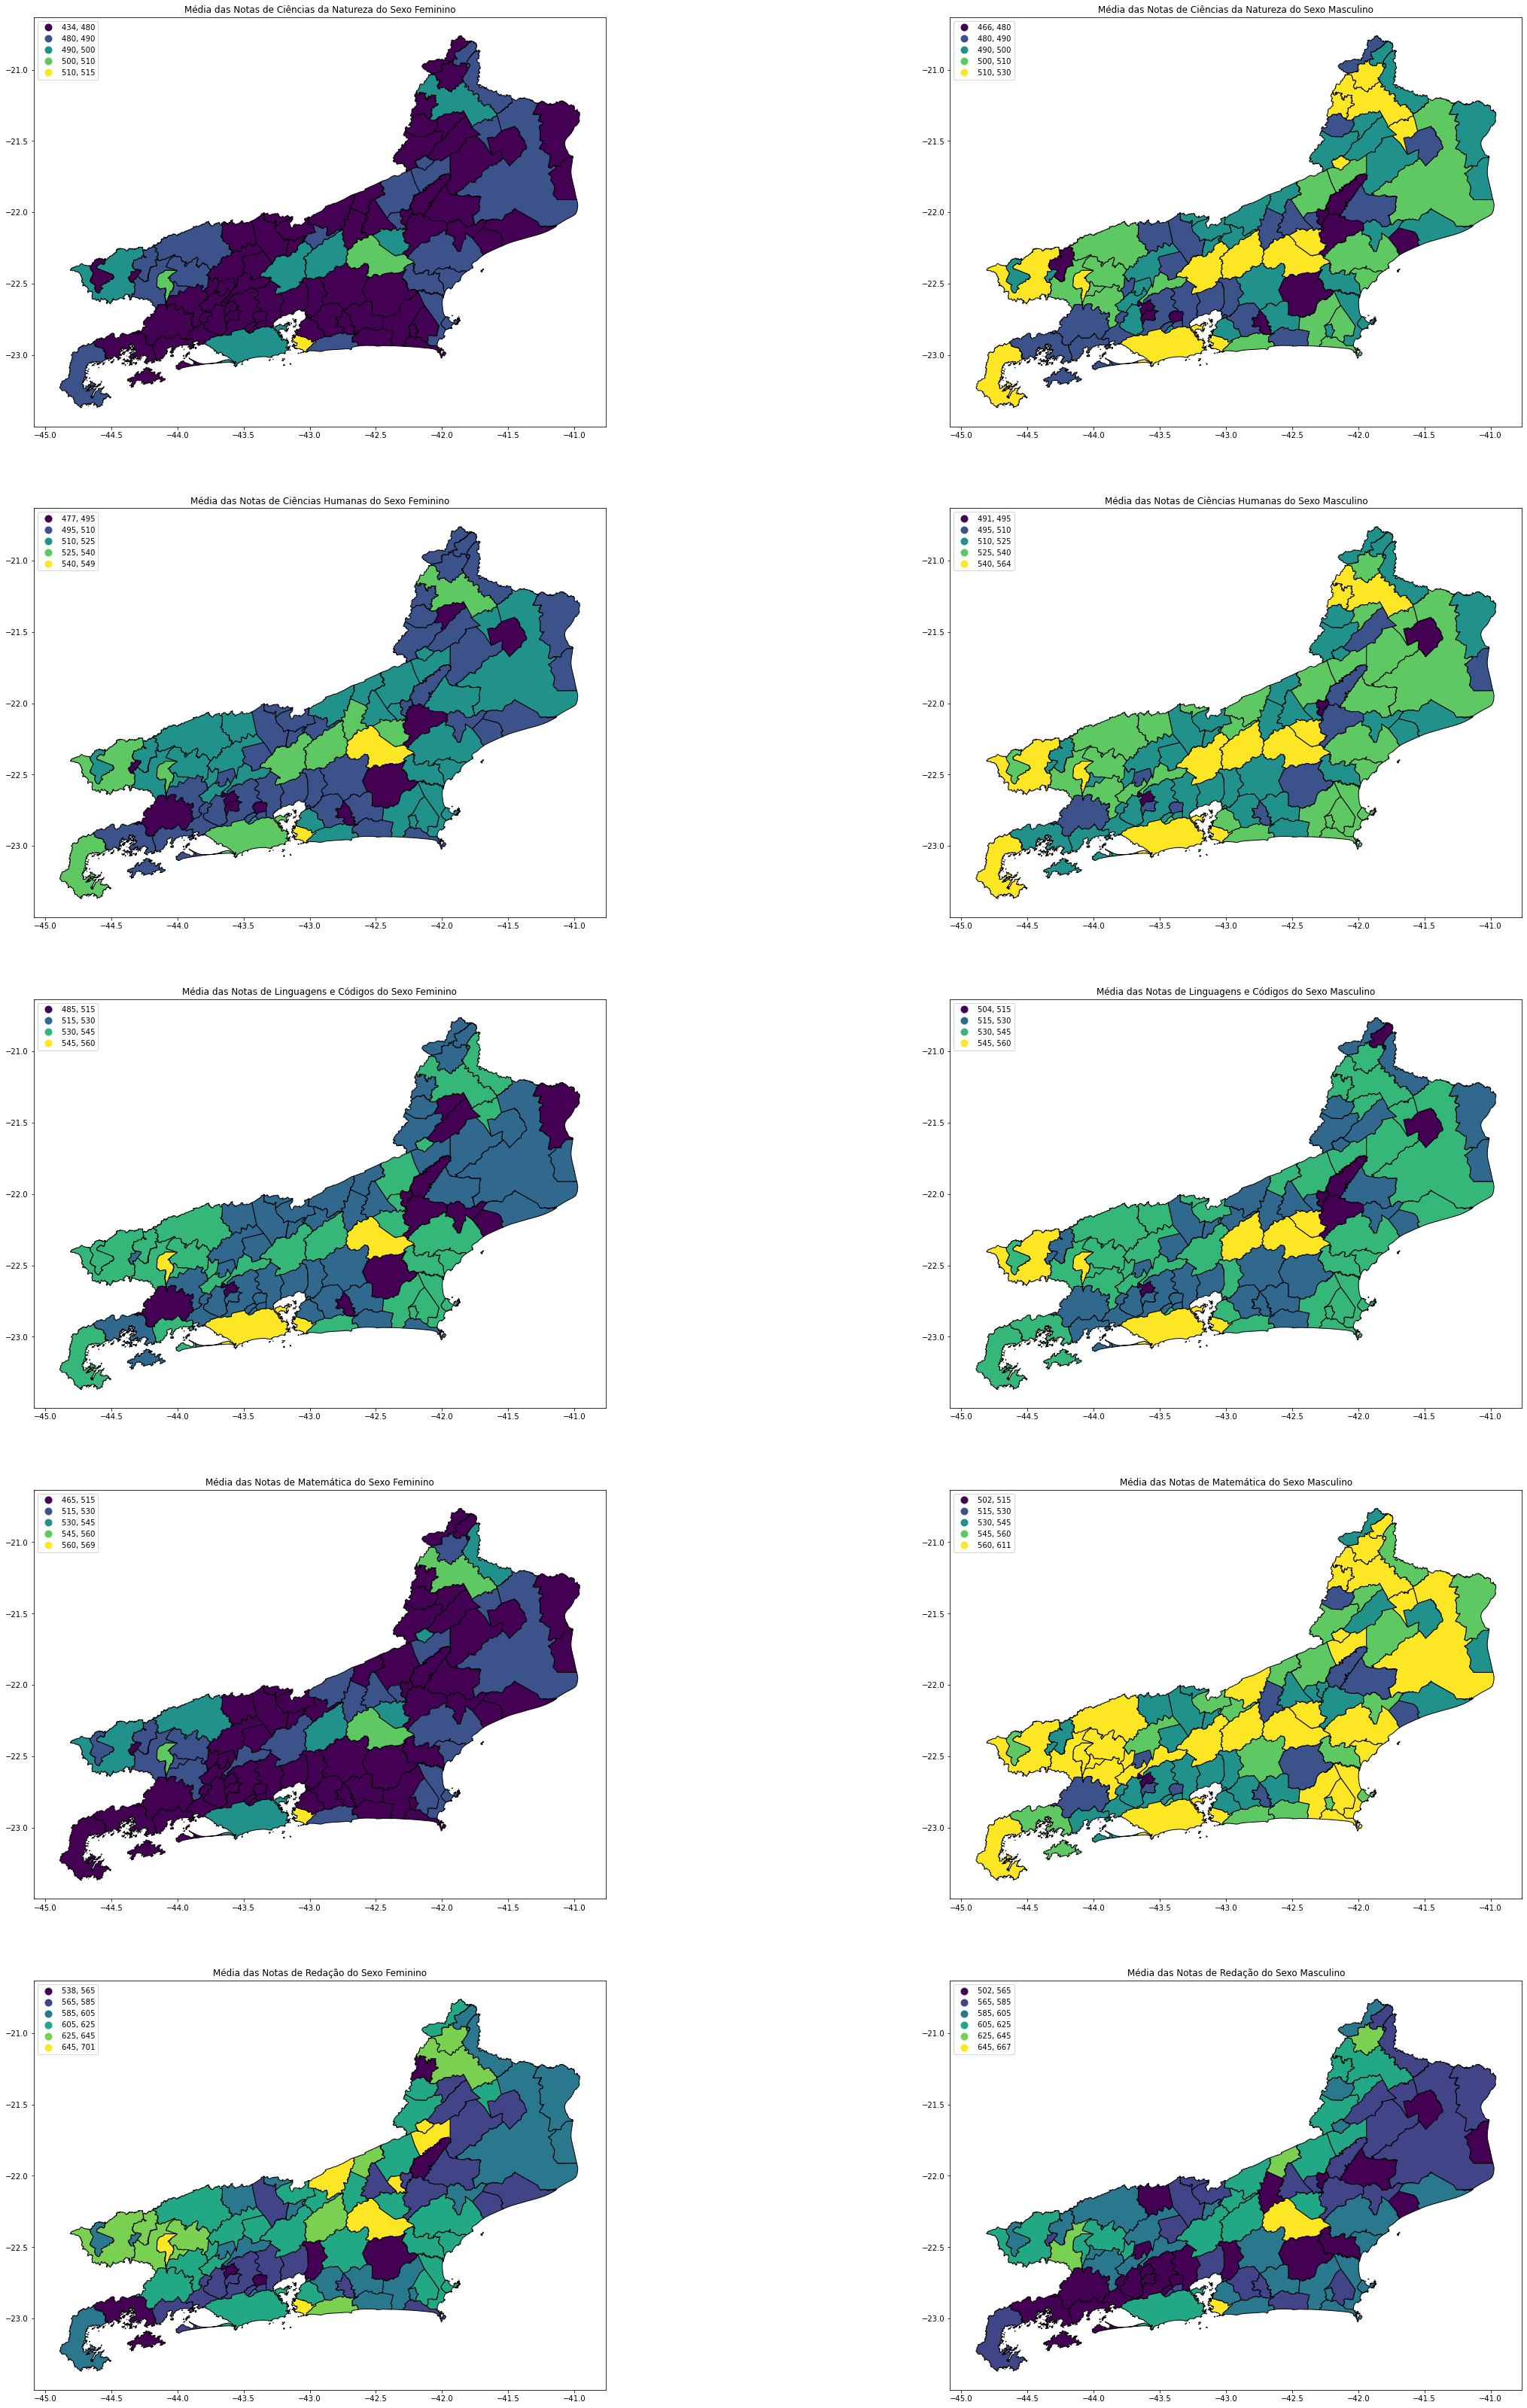

In [92]:
# Plotando os gráficos 
fig, axes = plt.subplots(5,2, figsize=(40,58))

# Ciências da Natureza
gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_CN_F', legend=True,
                           edgecolor='k', 
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[480, 490, 500, 510]},
                           legend_kwds={'loc': 'upper left',  'fmt':"{:.0f}"},
                           ax=axes[0,0]
                          ).set_title("Média das Notas de Ciências da Natureza do Sexo Feminino", fontsize=12)


gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_CN_M', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[480, 490, 500, 510]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[0,1]
                          ).set_title("Média das Notas de Ciências da Natureza do Sexo Masculino", fontsize=12)

# Ciências Humanas
gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_CH_F', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[495, 510, 525, 540]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[1,0]
                          ).set_title("Média das Notas de Ciências Humanas do Sexo Feminino", fontsize=12)

gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_CH_M', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[495, 510, 525, 540]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[1,1]
                          ).set_title("Média das Notas de Ciências Humanas do Sexo Masculino", fontsize=12)

# Linguagens e códigos
gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_LC_F', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[515, 530, 545, 560]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[2,0]
                          ).set_title("Média das Notas de Linguagens e Códigos do Sexo Feminino", fontsize=12)

gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_LC_M', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[515, 530, 545, 560]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[2,1]
                          ).set_title("Média das Notas de Linguagens e Códigos do Sexo Masculino", fontsize=12)

# Matemática
gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_MT_F', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[515, 530, 545, 560]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[3,0]
                          ).set_title("Média das Notas de Matemática do Sexo Feminino", fontsize=12)

gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_MT_M', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[515, 530, 545, 560]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[3,1]
                          ).set_title("Média das Notas de Matemática do Sexo Masculino", fontsize=12)

# Redação
gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_REDACAO_F', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[565, 585, 605, 625, 645]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[4,0]
                          ).set_title("Média das Notas de Redação do Sexo Feminino", fontsize=12)

gpdMediaMunicipiosRJFM.plot(column='NU_NOTA_REDACAO_M', 
                           legend=True,
                           edgecolor='k',
                           k=4,
                           scheme='UserDefined',
                           classification_kwds={'bins':[565, 585, 605, 625, 645]},
                           legend_kwds={'loc': 'upper left', 'fmt':"{:.0f}"},
                           ax=axes[4,1]
                          ).set_title("Média das Notas de Redação do Sexo Masculino", fontsize=12)

## Análise Racial dos Candidatos de Nova Fribugo x Rio de Janeiro

In [93]:
# Fazendo a Analise Racial dos candidatos de Nova Fribugo
dadosRacaNota = ['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [94]:
dadosRacaNotaNF = dadosNovaFriburgo.filter(items=dadosRacaNota)

In [95]:
dadosRacaNotaRJ = dadosRioDeJaneiro.filter(items=dadosRacaNota)

In [96]:
# desconsiderando os registros onde a raça é igual a "Não declarado"
dadosRacaNotaNF = dadosRacaNotaNF.query('TP_COR_RACA!=0')
dadosRacaNotaRJ = dadosRacaNotaRJ.query('TP_COR_RACA!=0')

In [97]:
dadosRacaNotaNF.head()

TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
292438            3       468.0       467.0       564.1       562.1   
509233            1       428.6       543.3       534.3       484.7   
509254            1       627.4       681.4       631.7       736.1   
509809            3       521.2       588.5       544.5       667.0   
510160            1       594.1       618.5       591.7       684.7   

        NU_NOTA_REDACAO  
292438            520.0  
509233            760.0  
509254            980.0  
509809            620.0  
510160            560.0

In [98]:
dadosRacaNotaRJ.head()

TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
10600             3       464.4       444.7       469.8       419.8   
30365             3       423.1       499.0       522.1       431.8   
135524            3       363.2       413.4       489.7       488.6   
149412            3       508.0       605.6       579.0       580.4   
203453            3       538.2       506.2       586.4       599.8   

        NU_NOTA_REDACAO  
10600             640.0  
30365             560.0  
135524            400.0  
149412            900.0  
203453            540.0

In [99]:
# # Substituindo o número da coluna cor raça, pelo nome descrito no dicionário
# # 0: Não declarado
# # 1: Branca
# # 2: Preta
# # 3: Parda
# # 4: Amarela
# # 5: Indígena 

dadosRacaNotaNF['TP_COR_RACA']= dadosRacaNotaNF['TP_COR_RACA'].map({1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena' })
dadosRacaNotaRJ['TP_COR_RACA']= dadosRacaNotaRJ['TP_COR_RACA'].map({1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena' })

In [100]:
dadosRacaNotaNF.head()

TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
292438       Parda       468.0       467.0       564.1       562.1   
509233      Branca       428.6       543.3       534.3       484.7   
509254      Branca       627.4       681.4       631.7       736.1   
509809       Parda       521.2       588.5       544.5       667.0   
510160      Branca       594.1       618.5       591.7       684.7   

        NU_NOTA_REDACAO  
292438            520.0  
509233            760.0  
509254            980.0  
509809            620.0  
510160            560.0

In [101]:
dadosRacaNotaRJ.head()

TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
10600        Parda       464.4       444.7       469.8       419.8   
30365        Parda       423.1       499.0       522.1       431.8   
135524       Parda       363.2       413.4       489.7       488.6   
149412       Parda       508.0       605.6       579.0       580.4   
203453       Parda       538.2       506.2       586.4       599.8   

        NU_NOTA_REDACAO  
10600             640.0  
30365             560.0  
135524            400.0  
149412            900.0  
203453            540.0

<AxesSubplot:title={'center':'Distribuição Racial no Estado do Rio de Janeiro'}>

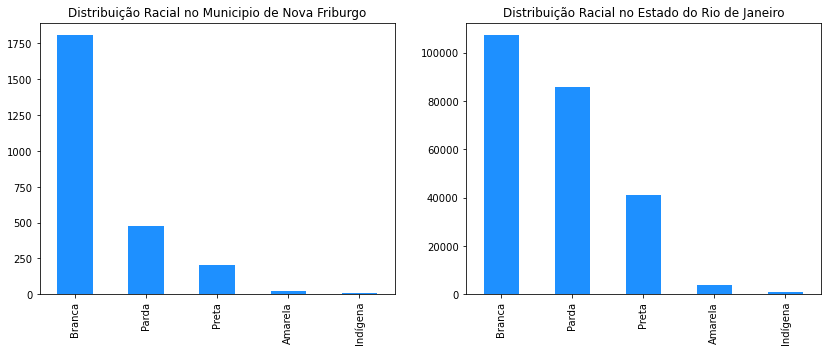

In [102]:
# Count de candidatos por raça no Municipio de Nova Fribugo
fig, axes = plt.subplots(1,2, figsize=(14,5))

dadosRacaNotaNF['TP_COR_RACA'].value_counts().plot.bar( 
    color=['dodgerblue'],
    title='Distribuição Racial no Municipio de Nova Friburgo',
    ax= axes[0]
)

dadosRacaNotaRJ['TP_COR_RACA'].value_counts().plot.bar( 
    color=['dodgerblue'],
    title='Distribuição Racial no Estado do Rio de Janeiro',
    ax= axes[1]
)


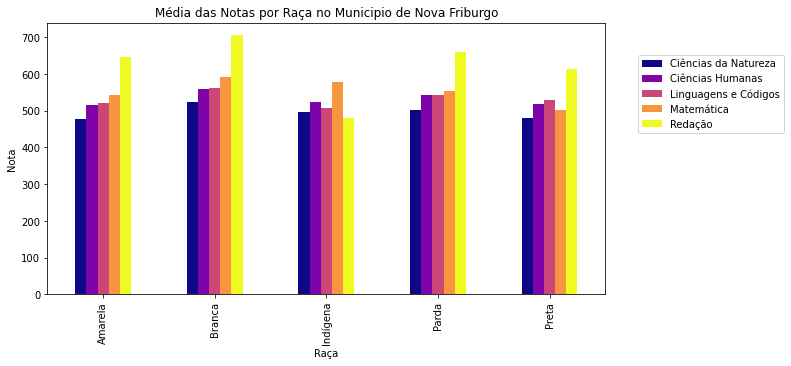

In [103]:
# Média das Notas por Raça no Municipio de Nova Friburgo
dadosRacaNotaNFMedia = dadosRacaNotaNF.groupby(['TP_COR_RACA']).mean()

dadosRacaNotaNFMedia.plot.bar(
    figsize=(10,5),
    cmap='plasma',
    title = 'Média das Notas por Raça no Municipio de Nova Friburgo',
    ylabel = 'Nota',
    xlabel = 'Raça',
).legend(["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"], bbox_to_anchor = (1.05, 0.9))

In [104]:
dadosRacaNotaNFMedia

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
TP_COR_RACA                                                                 
Amarela      478.392308  515.061538  522.076923  542.119231       645.384615
Branca       524.132060  559.290144  562.035327  592.492968       704.950166
Indígena     497.728571  523.128571  508.000000  577.728571       480.000000
Parda        500.635908  543.626514  543.006472  552.638205       660.793319
Preta        480.618049  517.008293  528.649268  501.402439       613.170732

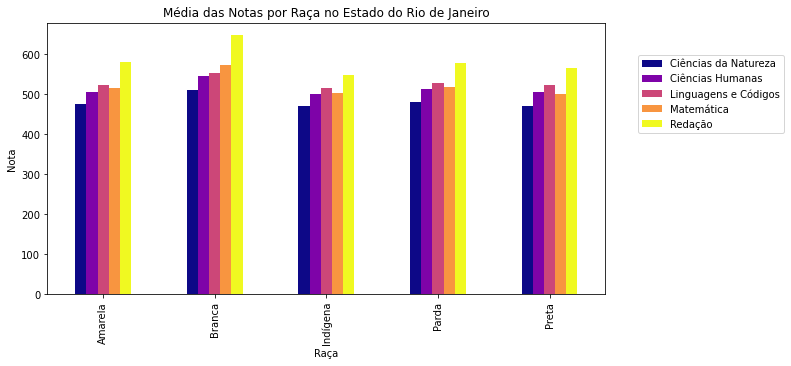

In [105]:
# Média das Notas por Raça no Estado do Rio de Janeiro
dadosRacaNotaRJMedia = dadosRacaNotaRJ.groupby(['TP_COR_RACA']).mean()

dadosRacaNotaRJMedia.plot.bar(
    figsize=(10,5),
    cmap='plasma',
    title = 'Média das Notas por Raça no Estado do Rio de Janeiro',
    ylabel = 'Nota',
    xlabel = 'Raça',
).legend(["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"], bbox_to_anchor = (1.05, 0.9))

In [106]:
# Fim da Analise Exploratoria por Idade, Sexo e Raça dos Candidatos do Estado do Rio de Janeiro e Municipio de Nova Friburgo

# Análise Exploratória dos dados Socioeconômicos do ENEM 2019

In [107]:
# Inicio da Analise Exploratória dos dados Socioeconômicos dos candidatos do Estado do Rio de Janeiro e
# Municipio de Nova Friburgo

In [108]:
dadosSocioEconomico = ['NU_INSCRICAO', 
                       'NO_MUNICIPIO_RESIDENCIA',
                       'NU_NOTA_CN', 
                       'NU_NOTA_CH', 
                       'NU_NOTA_LC', 
                       'NU_NOTA_MT', 
                       'NU_NOTA_REDACAO', 
                       'Q001', 
                       'Q002', 
                       'Q006']

In [109]:
# Filtrando os dados Socioeconomicos para o dataset de Nova Friburgo
dadosSocioEconomicoNF  = dadosNovaFriburgo.filter(items=dadosSocioEconomico)

In [110]:
dadosSocioEconomicoNF.head()

NU_INSCRICAO NO_MUNICIPIO_RESIDENCIA  NU_NOTA_CN  NU_NOTA_CH  \
292438  190001297072           Nova Friburgo       468.0       467.0   
509233  190001513873           Nova Friburgo       428.6       543.3   
509254  190001513894           Nova Friburgo       627.4       681.4   
509809  190001514449           Nova Friburgo       521.2       588.5   
510160  190001514800           Nova Friburgo       594.1       618.5   

        NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q006  
292438       564.1       562.1            520.0    D    B    E  
509233       534.3       484.7            760.0    D    D    C  
509254       631.7       736.1            980.0    E    F    O  
509809       544.5       667.0            620.0    C    C    B  
510160       591.7       684.7            560.0    F    F    I

In [111]:
# Filtrando os dados Socioeconomicos para o dataset do Rio de Janeiro
dadosSocioEconomicoRJ  = dadosRioDeJaneiro.filter(items=dadosSocioEconomico)

In [112]:
dadosSocioEconomicoRJ.head()

NU_INSCRICAO NO_MUNICIPIO_RESIDENCIA  NU_NOTA_CN  NU_NOTA_CH  \
10600   190001015227                  Italva       464.4       444.7   
30365   190001034993          Rio de Janeiro       423.1       499.0   
81663   190001086292          Rio de Janeiro       549.1       642.3   
135524  190001140153          Rio de Janeiro       363.2       413.4   
149412  190001154043               Itaperuna       508.0       605.6   

        NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q006  
10600        469.8       419.8            640.0    B    B    C  
30365        522.1       431.8            560.0    C    E    B  
81663        573.9       673.9            700.0    B    D    H  
135524       489.7       488.6            400.0    B    B    C  
149412       579.0       580.4            900.0    B    B    B

In [113]:
# Contagem de dados nulls por coluna nos dados Socioeconomicos do Municipio de Nova Friburgo
dadosSocioEconomicoNF.isnull().sum(axis=0)

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
dtype: int64

In [114]:
# Retirando os valores nulos dos dados Socioeconomicos do Estado do Rio de Janeiro
dadosSocioEconomicoNF = dadosSocioEconomicoNF.dropna()

In [115]:
# Verificando novamente a contagem de valores nulos 
dadosSocioEconomicoNF.isnull().sum(axis=0)

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
dtype: int64

In [116]:
# Contagem de dados nulls por coluna nos dados Socioeconomicos do Estado do Rio de Janeiro
dadosSocioEconomicoRJ.isnull().sum(axis=0)

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
dtype: int64

In [117]:
# Retirando os valores nulos dos dados Socioeconomicos do Estado do Rio de Janeiro
dadosSocioEconomicoRJ = dadosSocioEconomicoRJ.dropna()

In [118]:
# Verificando novamente a contagem de valores nulos 
dadosSocioEconomicoRJ.isnull().sum(axis=0)

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
NU_NOTA_REDACAO            0
Q001                       0
Q002                       0
Q006                       0
dtype: int64

In [119]:
# Inicio da Analise das questões 001 e 002, referentes a escolaridade do pai e da mãe
# Criando duas novas colunas no dataset para referenciar a descrição do dicionário de acordo com a resposta do candidato

q001e002Dicionario = {'A': 'Nunca estudou', 
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H': 'Não sei'}

# Para questão 001
dadosSocioEconomicoNF['DESC_Q001'] = [q001e002Dicionario[resp] for resp in dadosSocioEconomicoNF.Q001]
dadosSocioEconomicoRJ['DESC_Q001'] = [q001e002Dicionario[resp] for resp in dadosSocioEconomicoRJ.Q001]

# Para questão 002
dadosSocioEconomicoNF['DESC_Q002'] = [q001e002Dicionario[resp] for resp in dadosSocioEconomicoNF.Q002]
dadosSocioEconomicoRJ['DESC_Q002'] = [q001e002Dicionario[resp] for resp in dadosSocioEconomicoRJ.Q002]

In [120]:
dadosSocioEconomicoNF.head()

NU_INSCRICAO NO_MUNICIPIO_RESIDENCIA  NU_NOTA_CN  NU_NOTA_CH  \
292438  190001297072           Nova Friburgo       468.0       467.0   
509233  190001513873           Nova Friburgo       428.6       543.3   
509254  190001513894           Nova Friburgo       627.4       681.4   
509809  190001514449           Nova Friburgo       521.2       588.5   
510160  190001514800           Nova Friburgo       594.1       618.5   

        NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q006  \
292438       564.1       562.1            520.0    D    B    E   
509233       534.3       484.7            760.0    D    D    C   
509254       631.7       736.1            980.0    E    F    O   
509809       544.5       667.0            620.0    C    C    B   
510160       591.7       684.7            560.0    F    F    I   

                                                DESC_Q001  \
292438  Completou a 8ª série/9º ano do Ensino Fundamen...   
509233  Completou a 8ª série/9º ano do Ensino Fundamen...   
509254  Completou o Ensino Médio, mas não completou a ...   
509809  Completou a 4ª série/5º ano, mas não completou...   
510160  Completou a Faculdade, mas não completou a Pós...   

                                                DESC_Q002  
292438  Não completou a 4ª série/5º ano do Ensino Fund...  
509233  Completou a 8ª série/9º ano do Ensino Fundamen...  
509254  Completou a Faculdade, mas não completou a Pós...  
509809  Completou a 4ª série/5º ano, mas não completou...  
510160  Completou a Faculdade, mas não completou a Pós...

In [121]:
dadosSocioEconomicoRJ.head()

NU_INSCRICAO NO_MUNICIPIO_RESIDENCIA  NU_NOTA_CN  NU_NOTA_CH  \
10600   190001015227                  Italva       464.4       444.7   
30365   190001034993          Rio de Janeiro       423.1       499.0   
81663   190001086292          Rio de Janeiro       549.1       642.3   
135524  190001140153          Rio de Janeiro       363.2       413.4   
149412  190001154043               Itaperuna       508.0       605.6   

        NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002 Q006  \
10600        469.8       419.8            640.0    B    B    C   
30365        522.1       431.8            560.0    C    E    B   
81663        573.9       673.9            700.0    B    D    H   
135524       489.7       488.6            400.0    B    B    C   
149412       579.0       580.4            900.0    B    B    B   

                                                DESC_Q001  \
10600   Não completou a 4ª série/5º ano do Ensino Fund...   
30365   Completou a 4ª série/5º ano, mas não completou...   
81663   Não completou a 4ª série/5º ano do Ensino Fund...   
135524  Não completou a 4ª série/5º ano do Ensino Fund...   
149412  Não completou a 4ª série/5º ano do Ensino Fund...   

                                                DESC_Q002  
10600   Não completou a 4ª série/5º ano do Ensino Fund...  
30365   Completou o Ensino Médio, mas não completou a ...  
81663   Completou a 8ª série/9º ano do Ensino Fundamen...  
135524  Não completou a 4ª série/5º ano do Ensino Fund...  
149412  Não completou a 4ª série/5º ano do Ensino Fund...

#### Distribuicao dos candidatos do ENEM por escolaridade do Pai 

In [122]:
# Distribuicao para os dados do Municipio de Nova Friburgo
dadosSocioEconomicoNF.filter(items=['NU_INSCRICAO', 'DESC_Q001']).groupby('DESC_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

NU_INSCRICAO
DESC_Q001                                                       
Completou o Ensino Médio, mas não completou a F...           703
Completou a 4ª série/5º ano, mas não completou ...           426
Não completou a 4ª série/5º ano do Ensino Funda...           401
Completou a 8ª série/9º ano do Ensino Fundament...           360
Completou a Faculdade, mas não completou a Pós-...           289
Completou a Pós-graduação                                    201
Não sei                                                      151
Nunca estudou                                                 45

In [123]:
# Distribuicao para os dados do Estado do Rio de Janeiro 
dadosSocioEconomicoRJ.filter(items=['NU_INSCRICAO', 'DESC_Q001']).groupby('DESC_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

NU_INSCRICAO
DESC_Q001                                                       
Completou o Ensino Médio, mas não completou a F...         81113
Não completou a 4ª série/5º ano do Ensino Funda...         34027
Completou a 4ª série/5º ano, mas não completou ...         29867
Completou a 8ª série/9º ano do Ensino Fundament...         29780
Completou a Faculdade, mas não completou a Pós-...         25891
Não sei                                                    21028
Completou a Pós-graduação                                  16753
Nunca estudou                                               5881

#### Distribuicao dos candidatos do ENEM por escolaridade da Mãe

In [124]:
# Distribuicao para os dados do Municipio de Nova Friburgo
dadosSocioEconomicoNF.filter(items=['NU_INSCRICAO', 'DESC_Q002']).groupby('DESC_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

NU_INSCRICAO
DESC_Q002                                                       
Completou o Ensino Médio, mas não completou a F...           780
Completou a 4ª série/5º ano, mas não completou ...           398
Completou a 8ª série/9º ano do Ensino Fundament...           385
Completou a Faculdade, mas não completou a Pós-...           335
Não completou a 4ª série/5º ano do Ensino Funda...           308
Completou a Pós-graduação                                    302
Não sei                                                       49
Nunca estudou                                                 19

In [125]:
# Distribuicao para os dados do Estado do Rio de Janeiro 
dadosSocioEconomicoRJ.filter(items=['NU_INSCRICAO', 'DESC_Q002']).groupby('DESC_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

NU_INSCRICAO
DESC_Q002                                                       
Completou o Ensino Médio, mas não completou a F...         93468
Completou a 8ª série/9º ano do Ensino Fundament...         33092
Completou a Faculdade, mas não completou a Pós-...         30944
Completou a 4ª série/5º ano, mas não completou ...         27791
Não completou a 4ª série/5º ano do Ensino Funda...         26533
Completou a Pós-graduação                                  22060
Não sei                                                     5834
Nunca estudou                                               4618

#### Média das notas por escolaridade do pai e da mãe

In [126]:
mediaPaiNF = dadosSocioEconomicoNF.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001']) \
                                .where(dadosSocioEconomicoNF.Q001 != 'H') \
                                .groupby('Q001') \
                                .mean()  \
                                .sort_values(by='Q001', ascending=True)

In [127]:
mediaPaiNF

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
Q001                                                                 
A     473.742222  499.291111  517.691111  497.482222       544.444444
B     482.343641  526.824688  533.094514  523.038903       625.885287
C     496.229343  538.780986  544.433803  547.196479       654.084507
D     513.814722  546.930278  551.059167  570.462778       676.722222
E     523.058037  557.803841  560.730156  588.484495       700.739687
F     555.088235  586.695156  579.624221  646.738408       767.404844
G     564.086070  596.537811  588.552239  662.679602       797.114428

In [128]:
mediaMaeNF = dadosSocioEconomicoNF.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q002']) \
                                .where(dadosSocioEconomicoNF.Q002 != 'H') \
                                .groupby('Q002') \
                                .mean()  \
                                .sort_values(by='Q002', ascending=True)

In [129]:
mediaMaeNF

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
Q002                                                                 
A     442.363158  501.673684  503.642105  458.794737       493.684211
B     479.678247  516.450325  527.745779  512.197727       609.740260
C     493.638945  538.782663  547.109045  543.454774       653.366834
D     499.845714  542.402857  545.500519  550.616364       660.311688
E     521.992949  556.714615  558.276154  587.494744       692.692308
F     545.567463  574.916716  573.415522  625.725970       750.925373
G     557.011589  589.479801  584.235430  652.446689       785.562914

In [130]:
mediaPaiRJ = dadosSocioEconomicoRJ.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001']) \
                                .where(dadosSocioEconomicoRJ.Q001 != 'H') \
                                .groupby('Q001') \
                                .mean()  \
                                .sort_values(by='Q001', ascending=True)

In [131]:
mediaPaiRJ

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
Q001                                                                 
A     454.925608  489.282095  503.534178  474.128329       508.685598
B     465.128754  499.135022  516.182308  493.067238       545.532077
C     473.200472  508.210808  524.653149  509.029906       570.901664
D     479.973351  514.250420  530.222485  520.795255       586.662189
E     496.049710  530.835425  542.753054  546.806307       619.454588
F     535.750427  569.647990  569.079765  612.402511       695.613920
G     551.185937  584.111282  577.839706  640.035212       729.890766

In [132]:
mediaMaeRJ = dadosSocioEconomicoRJ.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q002']) \
                                .where(dadosSocioEconomicoRJ.Q002 != 'H') \
                                .groupby('Q002') \
                                .mean()  \
                                .sort_values(by='Q002', ascending=True)

In [133]:
mediaMaeRJ

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
Q002                                                                 
A     452.306366  486.693136  499.516392  465.923408       491.069727
B     463.397652  497.472472  513.916300  486.472928       535.806731
C     470.104717  505.268594  521.468353  502.244529       558.304487
D     474.341536  508.850187  526.199045  512.457642       575.725251
E     491.027933  525.953174  539.457777  539.396280       609.309282
F     530.659071  564.807772  566.021830  604.737717       689.380171
G     544.880413  577.242738  573.897180  627.079538       716.718042

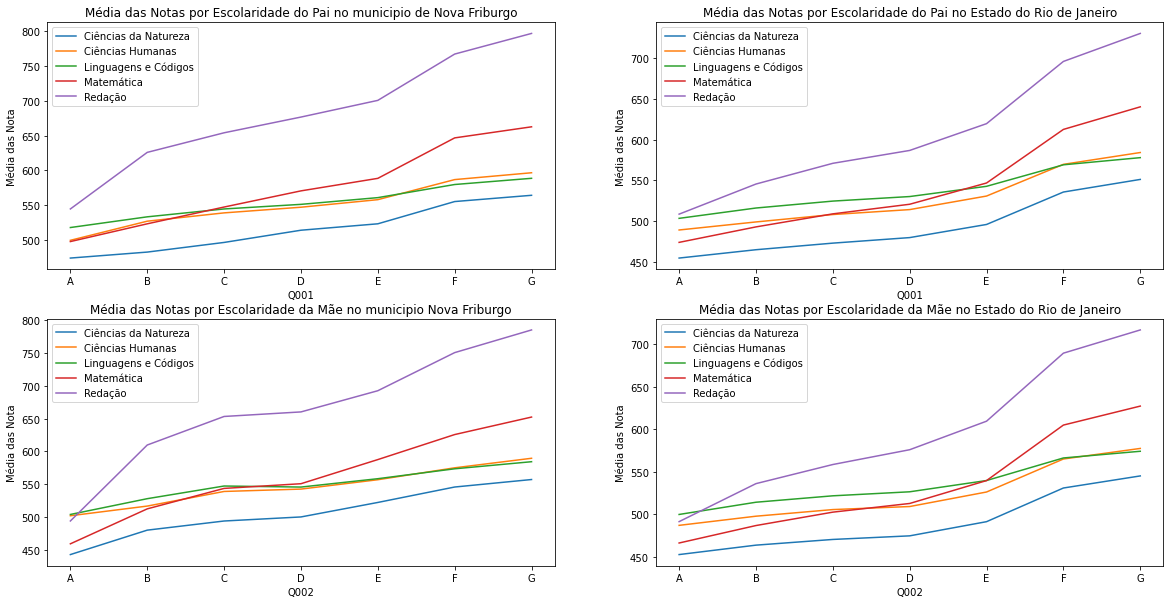

In [134]:
# Plotando os gráficos 
fig, axes = plt.subplots(2,2, figsize=(20,10))


mediaPaiNF.plot(
    ax=axes[0,0],
    title="Média das Notas por Escolaridade do Pai no municipio de Nova Friburgo",
    ylabel="Média das Nota"
).legend(["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"], loc = "upper left")

mediaPaiRJ.plot(
    ax=axes[0,1],
    title="Média das Notas por Escolaridade do Pai no Estado do Rio de Janeiro",
    ylabel="Média das Nota"
).legend(["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"], loc = "upper left")

mediaMaeNF.plot(
    ax=axes[1,0],
    title="Média das Notas por Escolaridade da Mãe no municipio Nova Friburgo",
    ylabel="Média das Nota"
).legend(["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"], loc = "upper left")

mediaMaeRJ.plot(
    ax=axes[1,1],
    title="Média das Notas por Escolaridade da Mãe no Estado do Rio de Janeiro",
    ylabel="Média das Nota"
).legend(["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"], loc = "upper left")

# A: Nunca estudou 
# B: Não completou a 4ª série/5º ano do Ensino Fundamental
# C: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
# D: Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
# E: Completou o Ensino Médio, mas não completou a Faculdade
# F: Completou a Faculdade, mas não completou a Pós-graduação
# G: Completou a Pós-graduação
# H: Não sei


### Dados socioculturais divulgados pela UERJ 

https://www.vestibular.uerj.br/?page_id=8392

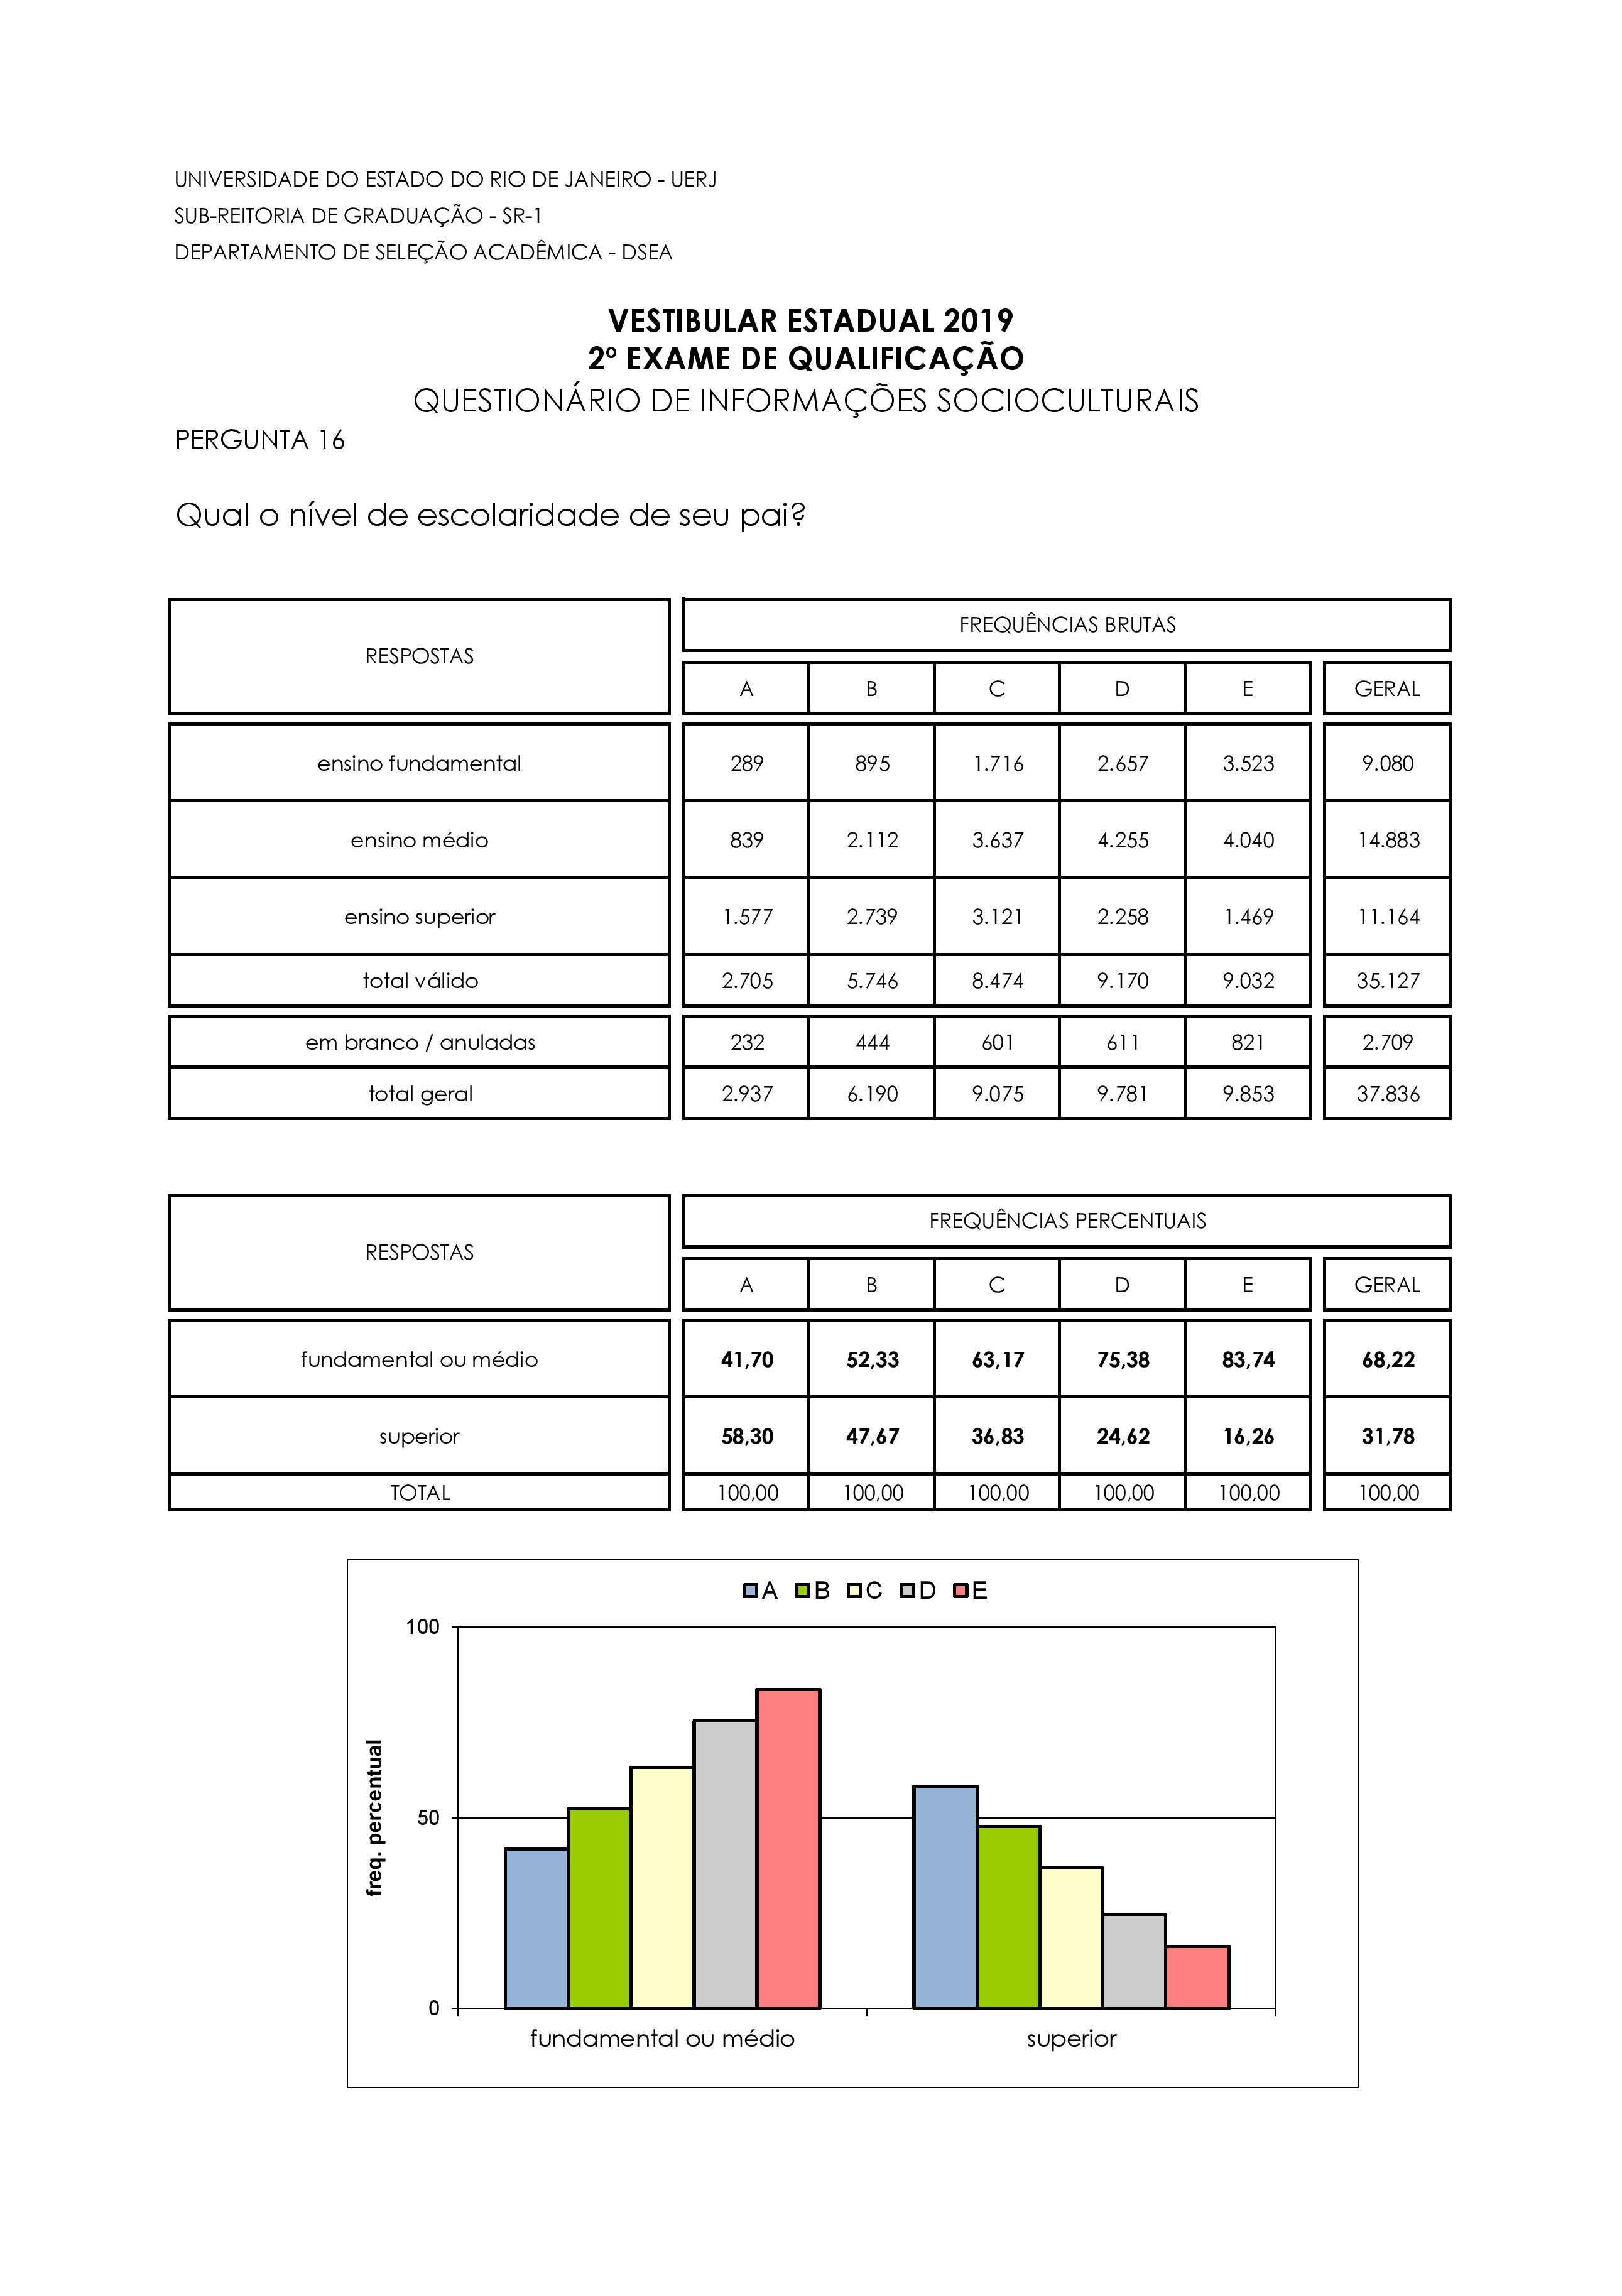

In [135]:
from IPython.display import Image
Image('Imagens/2019-SOCIO-SEGUNDO-EXAME-page-016.jpg')

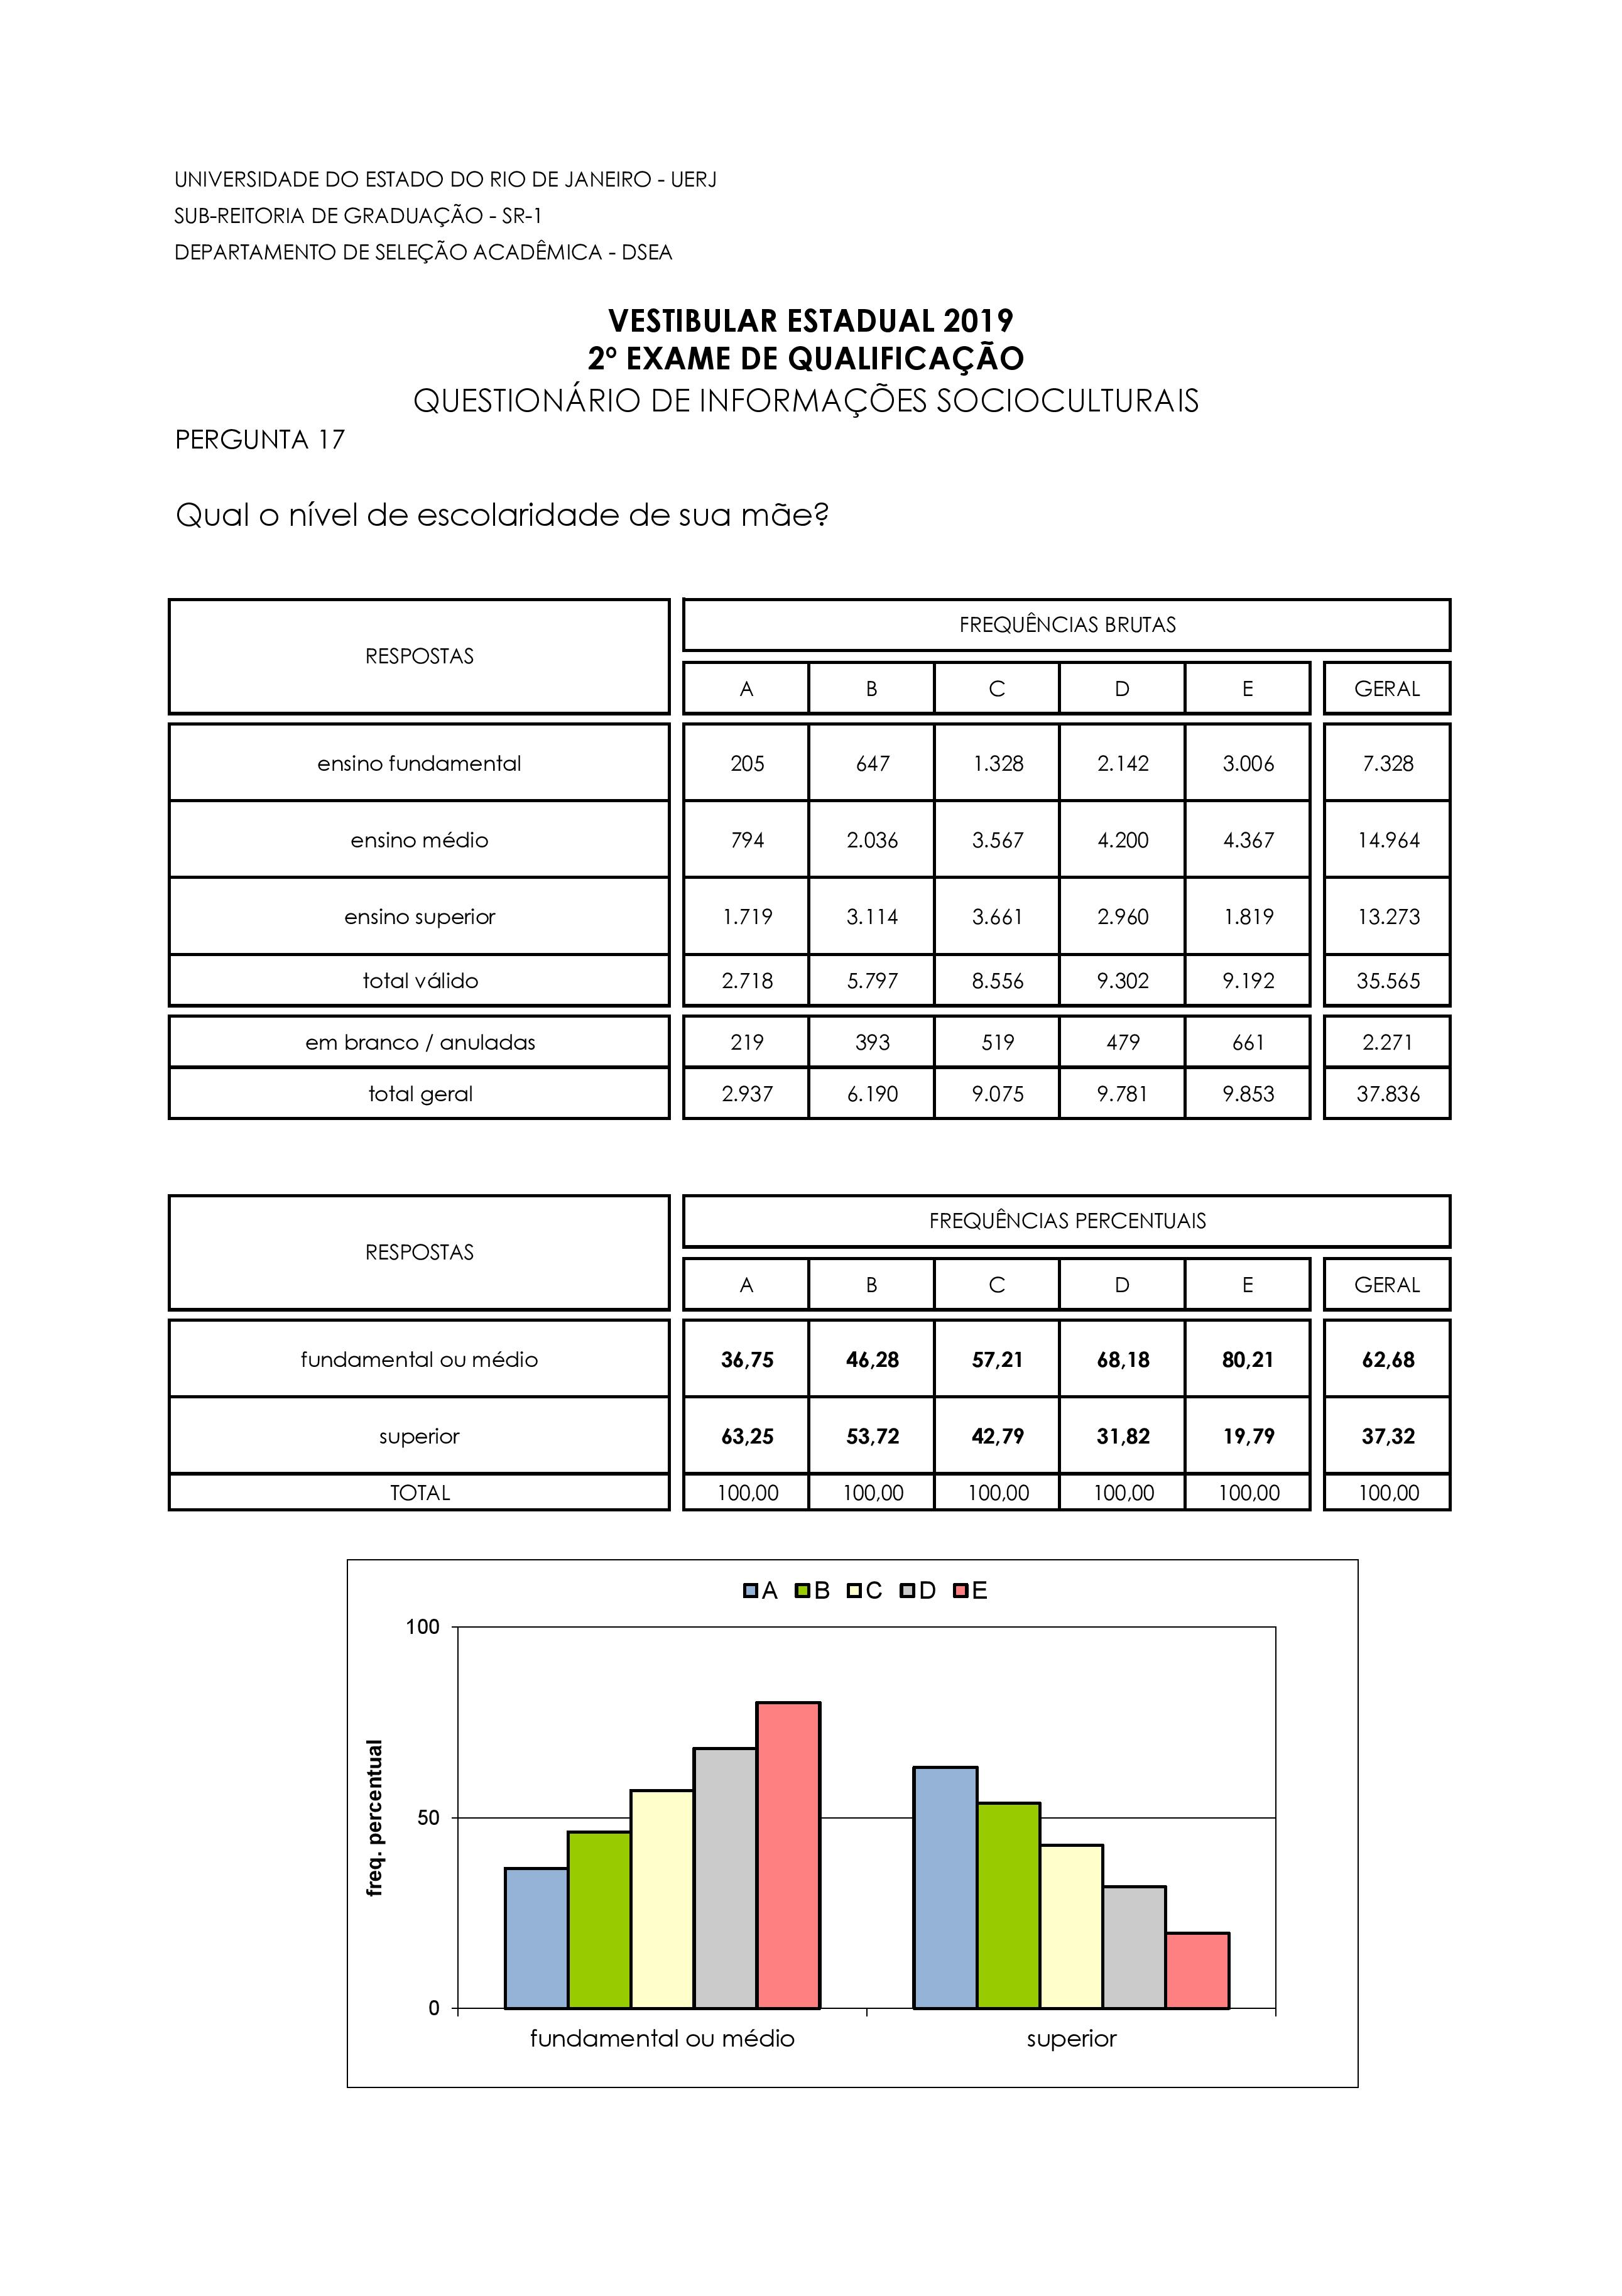

In [136]:
Image('Imagens/2019-SOCIO-SEGUNDO-EXAME-page-017.jpg')

### Análise da média das notas de acordo com a renda mensal familiar para o estado do Rio de Janeiro

In [137]:
mediaNotaRendaRJ = dadosSocioEconomicoRJ.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006']) \
                                .groupby('Q006') \
                                .mean()  \
                                .sort_values(by='Q006', ascending=True) 

In [138]:
mediaNotaRendaRJ

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
Q006                                                                 
A     460.867821  492.429439  510.439089  485.425623       522.864299
B     456.754618  489.398524  510.006427  483.310321       533.802346
C     469.497906  504.245325  522.623970  501.187033       563.763384
D     483.327171  518.795828  533.702527  524.756164       585.873524
E     489.391242  524.622437  537.985762  533.998682       604.780457
F     501.317100  536.891883  546.610041  555.240141       623.794310
G     510.641179  545.464381  552.496824  567.685277       644.300781
H     521.175010  555.426142  559.514697  587.463969       663.359407
I     527.752675  561.332584  563.817238  597.719302       680.082136
J     532.713795  567.283328  566.687745  607.539607       695.155721
K     539.556869  573.460416  570.853683  616.673882       705.042928
L     543.106709  576.992521  572.812989  623.941850       714.067942
M     547.649619  580.352433  575.867351  634.348652       718.804220
N     553.426866  588.009208  579.175697  643.588618       731.595570
O     560.040768  592.321554  582.959932  656.412648       744.132271
P     564.455239  598.140957  586.595369  667.331746       757.454075
Q     570.973144  607.472514  592.296239  685.278874       775.550305

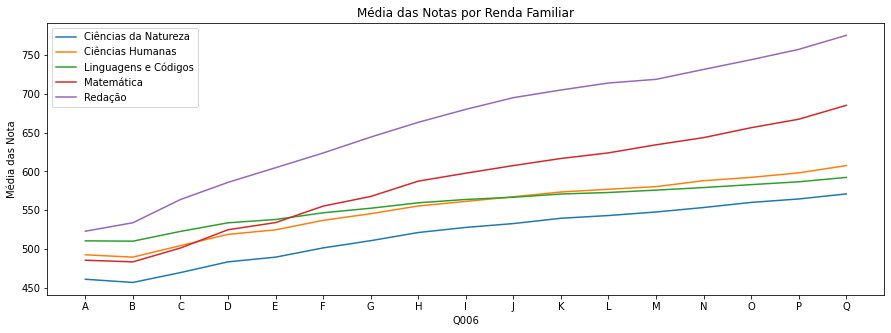

In [139]:
mediaNotaRendaRJ.plot(
    figsize=(15,5),
    title="Média das Notas por Renda Familiar",
    ylabel="Média das Nota",
    xticks=([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
).legend(["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"], loc = "upper left")


# A: Nenhuma renda.
# B: Até R$ 998,00.
# C: De R$ 998,01 até R$ 1.497,00.
# D: De R$ 1.497,01 até R$ 1.996,00.
# E: De R$ 1.996,01 até R$ 2.495,00.
# F: De R$ 2.495,01 até R$ 2.994,00.
# G: De R$ 2.994,01 até R$ 3.992,00.
# H: De R$ 3.992,01 até R$ 4.990,00.
# I: De R$ 4.990,01 até R$ 5.988,00.
# J: De R$ 5.988,01 até R$ 6.986,00.
# K: De R$ 6.986,01 até R$ 7.984,00.
# L: De R$ 7.984,01 até R$ 8.982,00.
# M: De R$ 8.982,01 até R$ 9.980,00.
# N: De R$ 9.980,01 até R$ 11.976,00.
# O: De R$ 11.976,01 até R$ 14.970,00.
# P: De R$ 14.970,01 até R$ 19.960,00.
# Q: Mais de R$ 19.960,00.

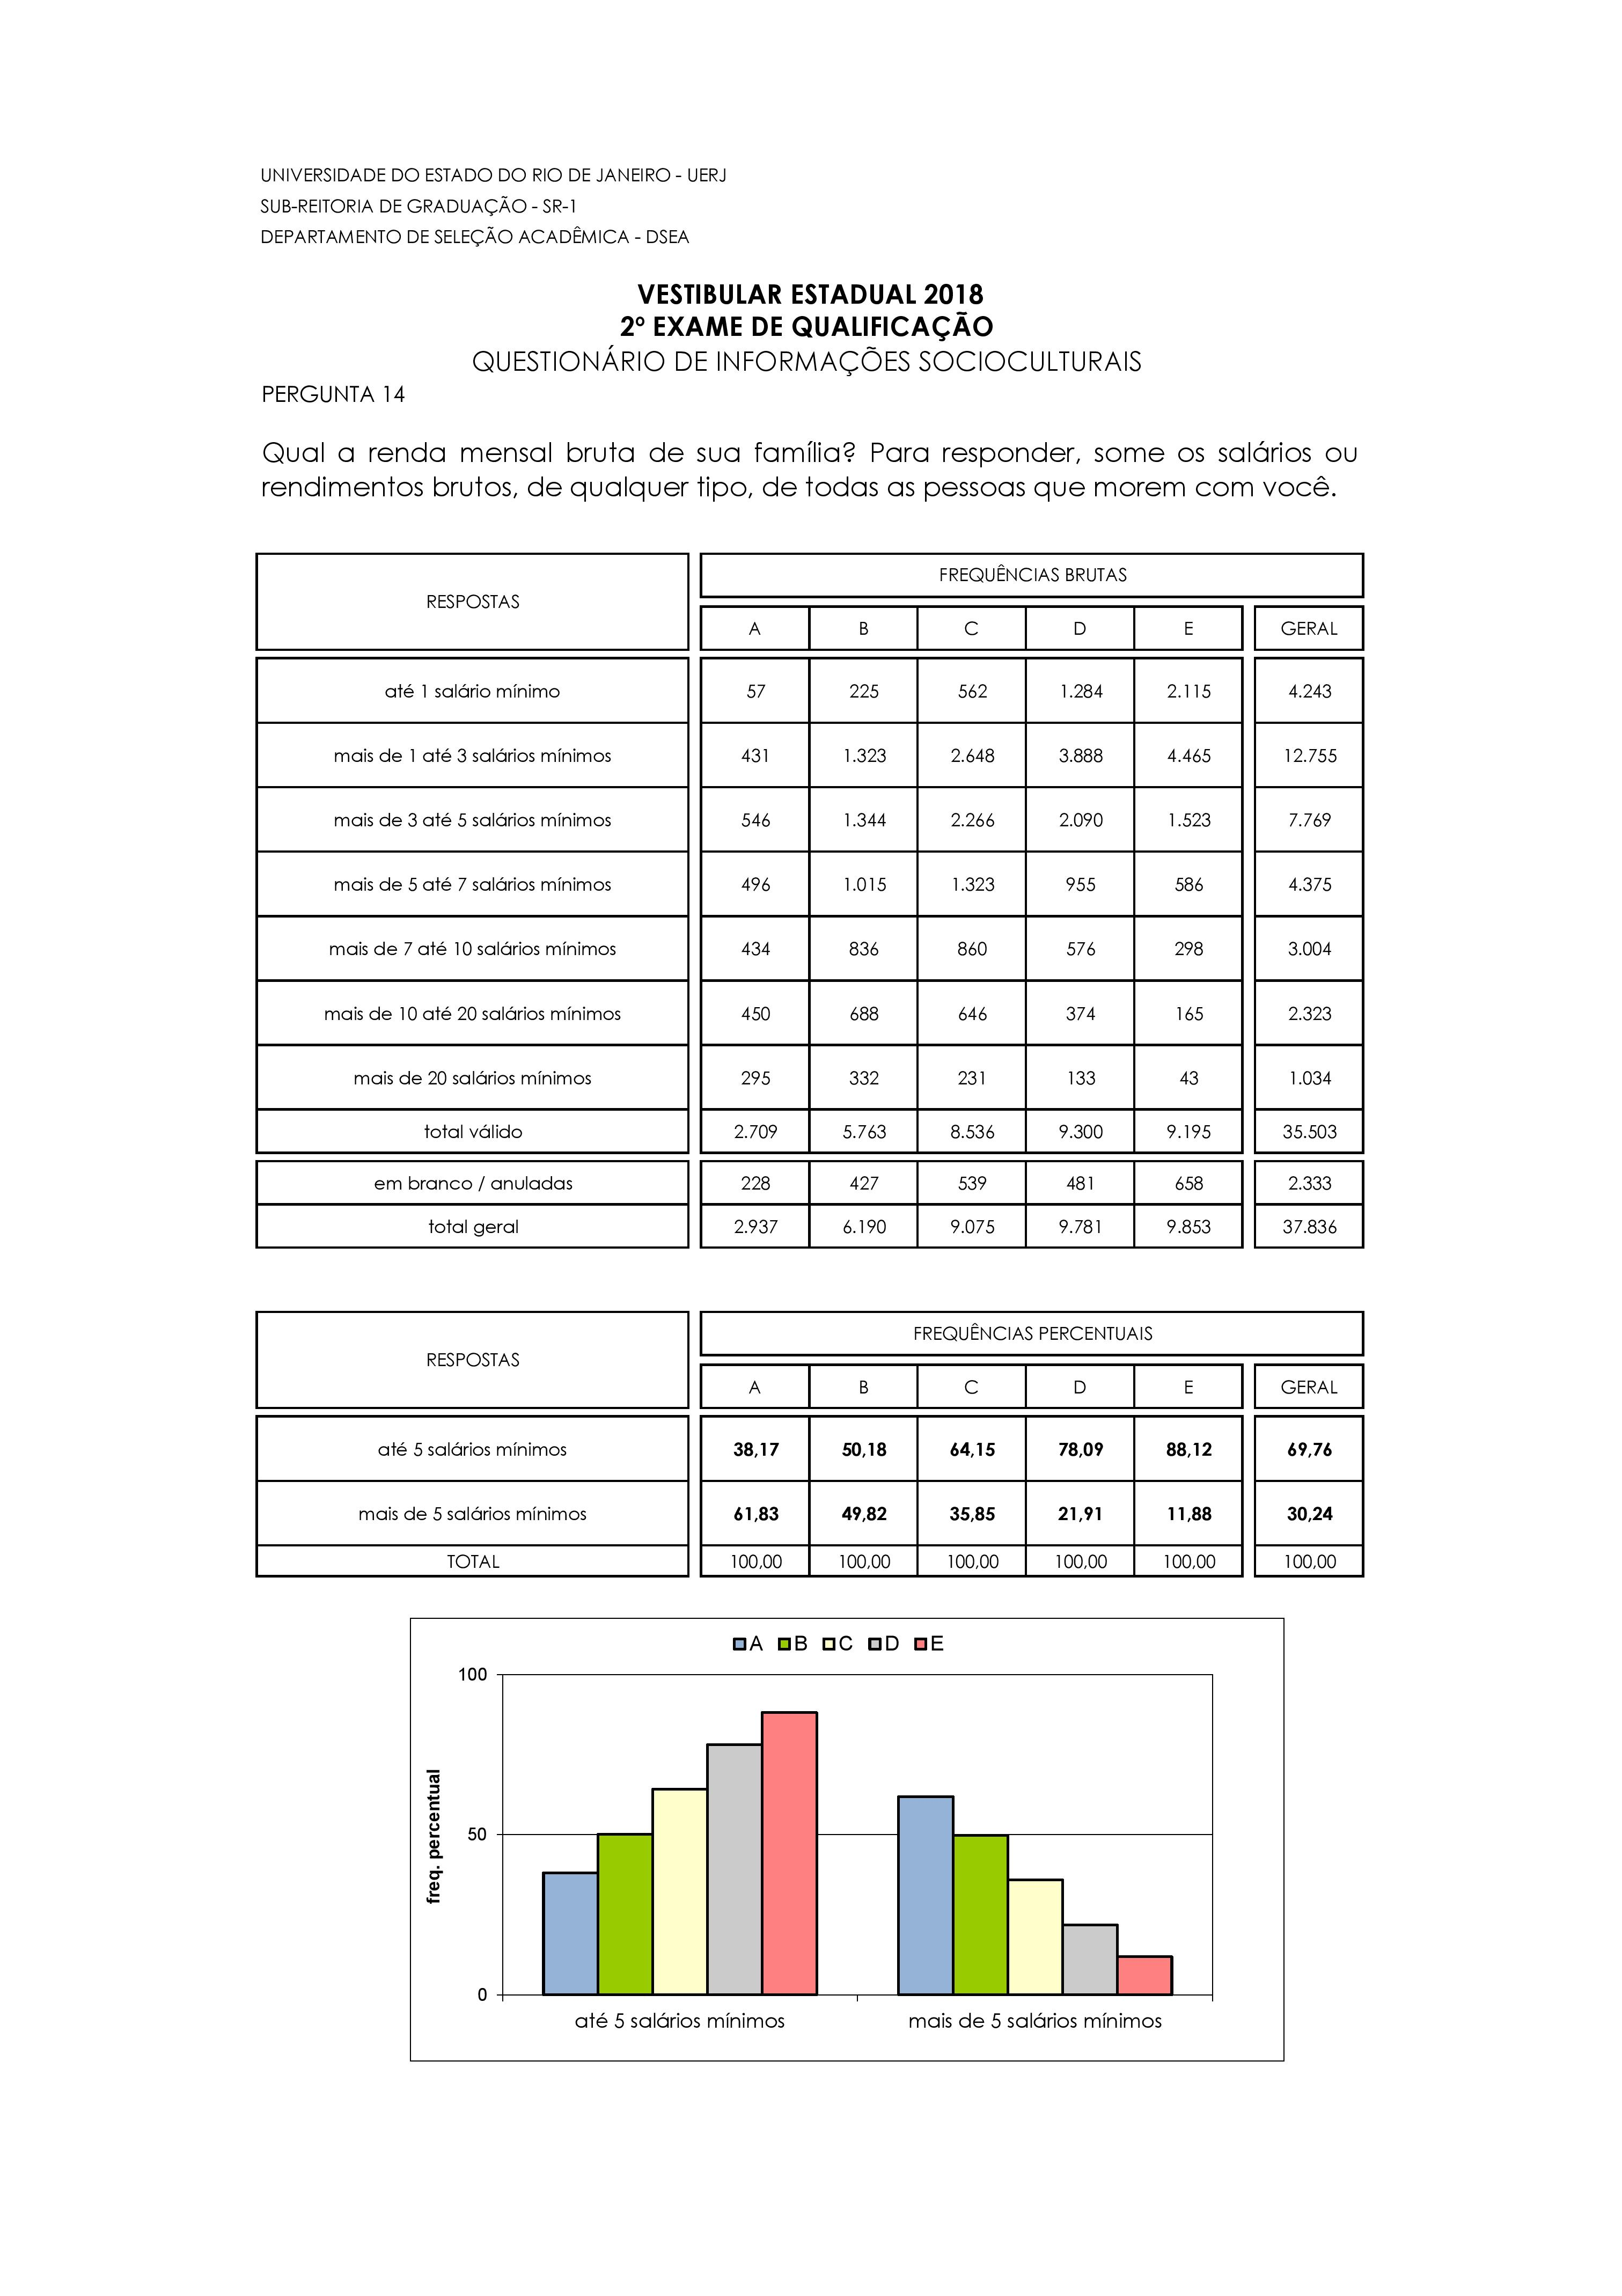

In [140]:
Image('Imagens/2019-SOCIO-SEGUNDO-EXAME-page-014.jpg')

#### Fim da análise socioecônomica